## **Overview**
**we will explore how to develop a suite of different types of LSTM models for time series forecasting.**

* ### **Univariate LSTM Models**

1. Data Preparation
2. Vanilla LSTM
3. Stacked LSTM
4. Bidirectional LSTM
5. CNN LSTM
6. ConvLSTM


* ### **Multivariate LSTM Models**

* ### **Multi-Step LSTM Models**

* ### **Multivariate Multi-Step LSTM Models**



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasRegressor # 回归神经网络

In [2]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import keras.backend as K
import os
import glob

## Univariate LSTM Models
LSTMs can be used to model univariate time series forecasting problems.

These are problems comprised of a single series of observations and a model is required to learn from the series of past observations to predict the next value in the sequence.

We will demonstrate a number of variations of the LSTM model for univariate time series forecasting

## 1. CEEMDAN Data Preparation

In [3]:
# import os
# import glob
#
# csv_path = '../../Data/PreData/ArtiData'
# csv_files = glob.glob(os.path.join(csv_path, '*.csv'))
#
# start_index = 10  # 起始索引，即第4个文件
# end_index = 12  # 结束索引，即第6个文件（不包括第7个文件）
#
# for index, file in enumerate(csv_files[start_index:end_index]):
#     # LSTM_ALL(os.path.basename(file))
#     print(os.path.basename(file))
#     print("-------------------------")

IMF = []
xlsx_file = 'CEEMDAN_Data/KAHUKUI/'
xlsx_path = glob.glob(os.path.join(xlsx_file,'*.xlsx'))

data_col_len = pd.read_excel('CEEMDAN_Data/KAHUKUI/CEEMDAN_KAHUKUI Station_WL.xlsx')

for imf_len in range(len(data_col_len.columns)):
    for file in xlsx_path:
         print(file)
         # print(os.path.basename(file))
         imfs = pd.read_excel(file)
         imfn = imfs.iloc[:,imf_len]
         imfn.to_numpy()
         IMF.append(imfn)
    print(imf_len,"-------------------")

CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_AT.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_Baro.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WD.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WG.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WL.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WS.xlsx
0 -------------------
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_AT.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_Baro.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WD.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WG.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WL.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WS.xlsx
1 -------------------
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_AT.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_Baro.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WD.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WG.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WL.xlsx
CEEMDAN_Data/KAHUKUI\CEEMDAN_KAHUKUI Station_WS.x

### 结果绘制

In [4]:
def Result_Ana(Model, feature_num):
    print('Result_Ana_Function:',testX.shape)
    y_pred = Model.predict(testX)
    y_pred = np.array(y_pred).reshape(-1, 1)
    #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将结果存储在prediction_copies_array数组中
    prediction_copies_array = np.repeat(y_pred, feature_num,axis=-1)
    #prediction_copies_array
    #prediction_copies_array.shape
    pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(y_pred), feature_num)))[:,feature_num-1] #进行逆变换但是，只需要最后一列

    # print(pred)
    print('Result_Ana_Function2:',testY.shape)
    original_copies_array = np.repeat(testY, feature_num, axis=-1)
    print('IMF_True:',scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num))))
    y_true = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num)))[:, feature_num-1]
    print('feature_num-1_waterl level_true:',y_true)
    # y_true = scaler.inverse_transform(np.array(testY).reshape(-1,1))

    y_true
    pred
    print(pred)
    plt.plot(y_true, color='red', label='Real Value')
    plt.plot(pred, color='blue', label='Pred Value')
    plt.title('Prediction Water Level(m)')
    plt.xlabel('Time (h)')
    plt.ylabel('Water Level(m)')
    plt.legend()
    # plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
    plt.show()
    # y_true_data = pd.DataFrame(y)
    # y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
    #               index=False)
    # pred_data = pd.DataFrame(pred)
    # pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
    #              index=False)
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import r2_score as r2
    print('MSE:',mse(y_true,pred))
    print('MAE:',mae(y_true,pred))
    print('R²:',r2(y_true,pred))
    print('RMSE:',np.sqrt(mse(y_true,pred)))
    print('pred_finally:',pred)

    return y_true,pred

### LSTM

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
-------------------------- 0 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 0 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0338 - val_loss: 0.0019
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 9.9143e-04 - val_loss: 0.0011
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 9.6515e-04 - val_loss: 0.0011
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 9.6403e-04 - val_loss: 0.0011
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 9.4402e-04 - val_loss: 0.0010
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 9.3840e-04 - val_los

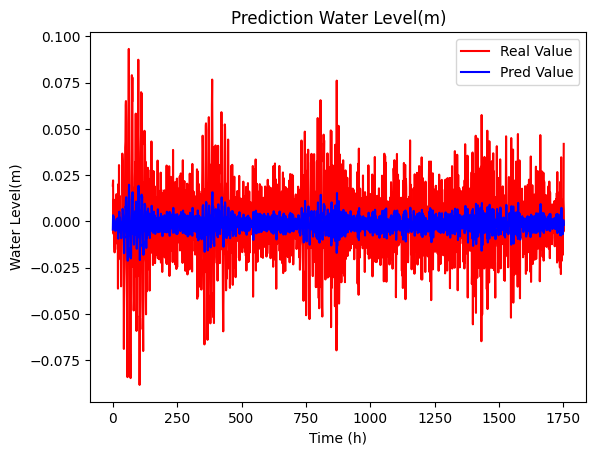

MSE: 0.00048522946807494626
MAE: 0.01721021732054015
R²: -0.017409047991549853
RMSE: 0.022027924733731642
pred_finally: [-0.00444013  0.0033221   0.00255308 ...  0.00059052  0.00067327
 -0.00184603]
prediction_result: [-0.00444013  0.0033221   0.00255308 ...  0.00059052  0.00067327
 -0.00184603]
lstm_y_turs: [ 0.01935259  0.02213772 -0.00627413 ...  0.00657959 -0.00548436
  0.04189374]
-------------------------- 1 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 1 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0195 - val_loss: 5.2056e-04
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 4.4493e-04 - val_loss: 4.8515e-04
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 4.1589e-04 - val_loss: 4.4039e-04
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 3.7867e-04 - val_loss: 4.0394e-04
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 3.5087e-04 - val_loss: 3.7609e-04
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 3.3232e-04 - val_loss: 3.5324e-04
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 3.1670e-04 - val_loss: 3.3986e-04
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 3.1308e-04 - val_loss: 3.4200e-04
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 2.9754e-04 - val_loss: 3.2382e-04
Epoch 10/30
110/110 [======================

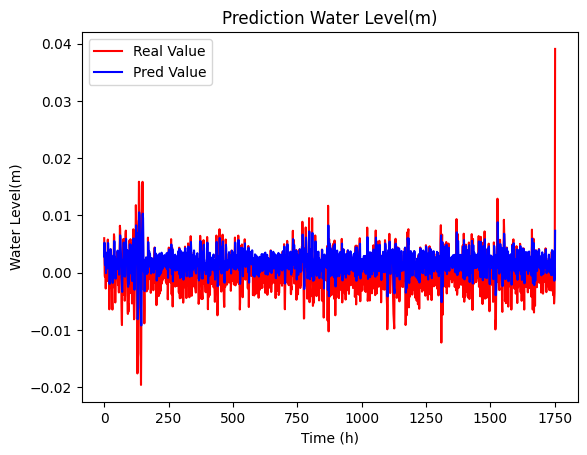

MSE: 1.2094536797703875e-05
MAE: 0.002723309399764303
R²: 0.057797517722186664
RMSE: 0.0034777200574088586
pred_finally: [ 0.00283929  0.00524089  0.00357006 ... -0.00107701 -0.00053202
  0.00732184]
prediction_result: [ 0.00283929  0.00524089  0.00357006 ... -0.00107701 -0.00053202
  0.00732184]
lstm_y_turs: [ 0.00602579  0.00311664 -0.00040043 ... -0.00353838  0.00971867
  0.03905641]
-------------------------- 2 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 2 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0527 - val_loss: 0.0103
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0053
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 11/3

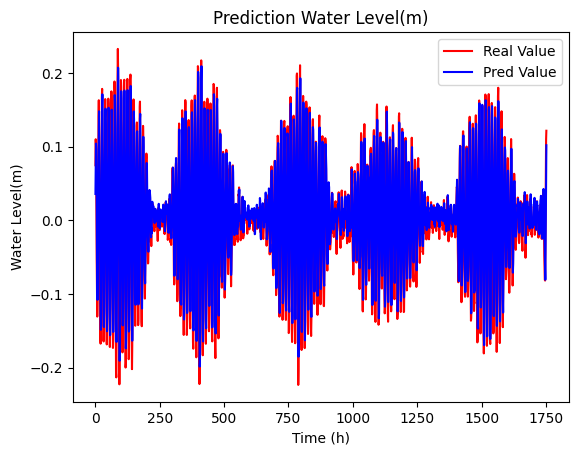

MSE: 0.0017056102665829003
MAE: 0.03229539357506964
R²: 0.7502358553776003
RMSE: 0.041299034693112385
pred_finally: [0.0358156  0.07608446 0.10424442 ... 0.0034425  0.06126716 0.10195939]
prediction_result: [0.0358156  0.07608446 0.10424442 ... 0.0034425  0.06126716 0.10195939]
lstm_y_turs: [0.07479785 0.11011702 0.10247981 ... 0.06663579 0.10985025 0.12167445]
-------------------------- 3 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 3 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0437 - val_loss: 0.0089
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 11/3

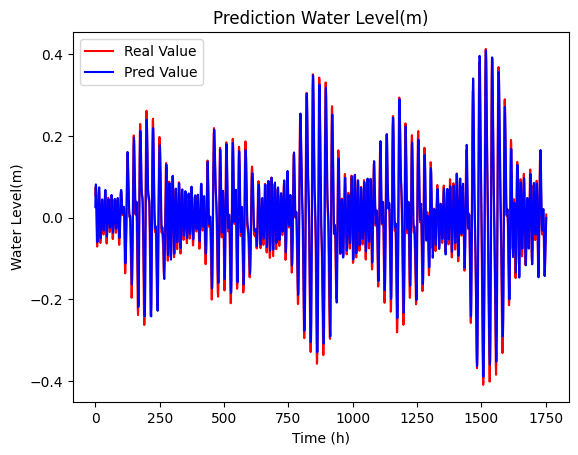

MSE: 0.001554200127032667
MAE: 0.032204749944209334
R²: 0.8987663647087971
RMSE: 0.039423344949822144
pred_finally: [ 0.0257382   0.06223534  0.08135916 ... -0.04746873 -0.02051288
 -0.00050268]
prediction_result: [ 0.0257382   0.06223534  0.08135916 ... -0.04746873 -0.02051288
 -0.00050268]
lstm_y_turs: [ 0.05415091  0.07486614  0.07087559 ... -0.03213811 -0.0074835
  0.00763638]
-------------------------- 4 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 4 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0590 - val_loss: 0.0107
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0085
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0061
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0047
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0044
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0043
Epoch 11/3

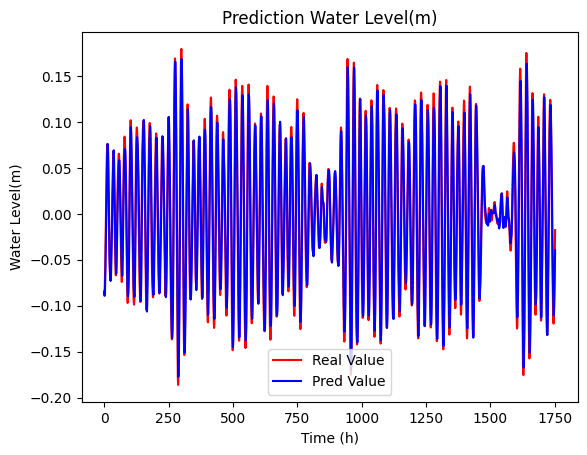

MSE: 0.0005563283705798805
MAE: 0.020128674057268602
R²: 0.9119024805296967
RMSE: 0.023586614224595282
pred_finally: [-0.08461253 -0.08910216 -0.08925893 ... -0.07376878 -0.05809165
 -0.03977621]
prediction_result: [-0.08461253 -0.08910216 -0.08925893 ... -0.07376878 -0.05809165
 -0.03977621]
lstm_y_turs: [-0.08635675 -0.08601982 -0.08061906 ... -0.06512362 -0.04250088
 -0.01775367]
-------------------------- 5 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 5 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0437 - val_loss: 0.0077
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 5.1432e-04 - val_loss: 6.3380e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 2.8996e-04 - val_loss: 4.9245e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 2.7069e-04 - val_loss: 4.7017e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 2.6211e-04 - val_loss: 4.4980e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 2.7102e-04 - val_loss: 5.1151e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 2.5607e-04 - val_loss: 4.3483e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 2.5646e-04 - val_loss: 4.3638e-04
Epoch 10/30
110/110 [==============================] - 

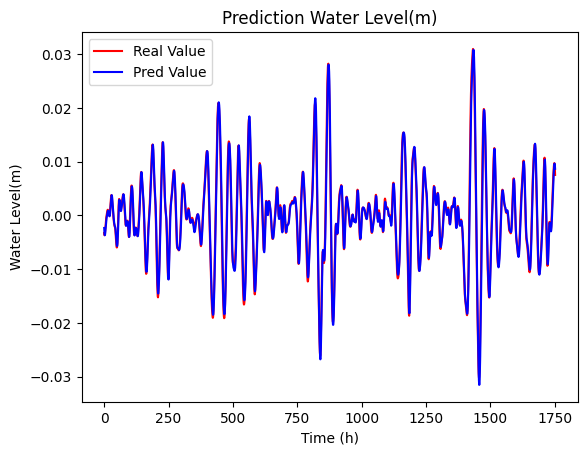

MSE: 1.7772584591436209e-06
MAE: 0.0010171396479683036
R²: 0.9744990229475822
RMSE: 0.001333138574621416
pred_finally: [-0.00233773 -0.00324664 -0.00368337 ...  0.00963673  0.00940836
  0.00866568]
prediction_result: [-0.00233773 -0.00324664 -0.00368337 ...  0.00963673  0.00940836
  0.00866568]
lstm_y_turs: [-0.00324769 -0.00368721 -0.00365793 ...  0.00950843  0.00878657
  0.00752471]
-------------------------- 6 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 6 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0301 - val_loss: 0.0110
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0083
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 4.5452e-04 - val_loss: 0.0031
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 2.2832e-04 - val_loss: 0.0021
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0236e-04 - val_loss: 0.0016
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 5.2517e-05 - val_loss: 0.0014
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 3.5198e-05 - val_loss: 0.0013
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 3.2097e-05 - val_loss: 0.0013
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 3.1279e-05 -

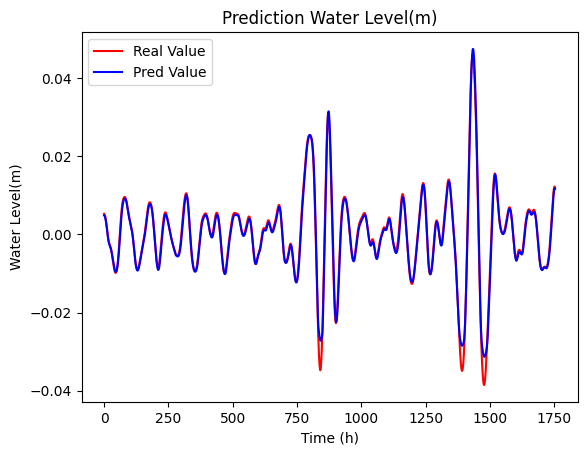

MSE: 1.78219646414731e-06
MAE: 0.0008279606973131338
R²: 0.9858885558991848
RMSE: 0.0013349893123719419
pred_finally: [0.00487079 0.00484361 0.00475956 ... 0.01165933 0.01179471 0.01175248]
prediction_result: [0.00487079 0.00484361 0.00475956 ... 0.01165933 0.01179471 0.01175248]
lstm_y_turs: [0.00526768 0.00521012 0.00509492 ... 0.01224018 0.01220006 0.01198972]
-------------------------- 7 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 7 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0478 - val_loss: 0.0089
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 8.8975e-04 - val_loss: 9.0753e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 2.1484e-04 - val_loss: 3.0713e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 6.3278e-05 - val_loss: 1.7067e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 3.8935e-05 - val_loss: 1.5045e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 3.4948e-05 - val_loss: 1.5177e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 3.3856e-05 - val_loss: 1.5324e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 3.3572e-05 - val_loss: 1.4849e-04
Epoch 10/30
110/110 [==============================] - 

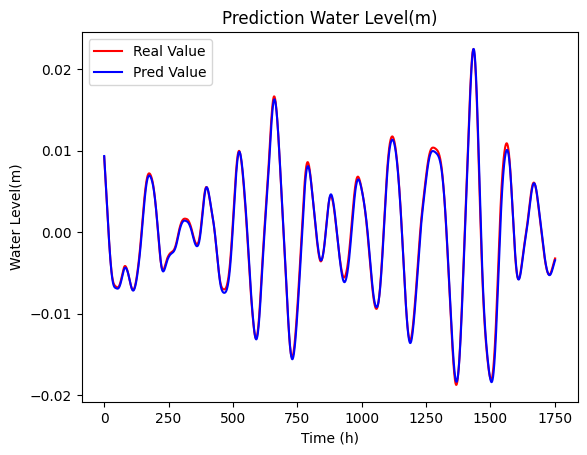

MSE: 2.1820745143319482e-07
MAE: 0.00035842646031297113
R²: 0.9963027569794943
RMSE: 0.0004671268044473522
pred_finally: [ 0.00932153  0.00876174  0.00820012 ... -0.00362315 -0.00352928
 -0.00344684]
prediction_result: [ 0.00932153  0.00876174  0.00820012 ... -0.00362315 -0.00352928
 -0.00344684]
lstm_y_turs: [ 0.00919664  0.00864159  0.00808506 ... -0.00338509 -0.00330145
 -0.00323046]
-------------------------- 8 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 8 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0602 - val_loss: 0.0432
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0213
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0062
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 5.7308e-04 - val_loss: 0.0023
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 1.4996e-04 - val_loss: 0.0018
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 9.8031e-05 - val_loss: 0.0015
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 7.5535e-05 - val_loss: 0.0014
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 6.4545e-05 - val_loss: 0.0013
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 5.9197e-05 - val_loss: 0.0013
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 5.4658e-05 -

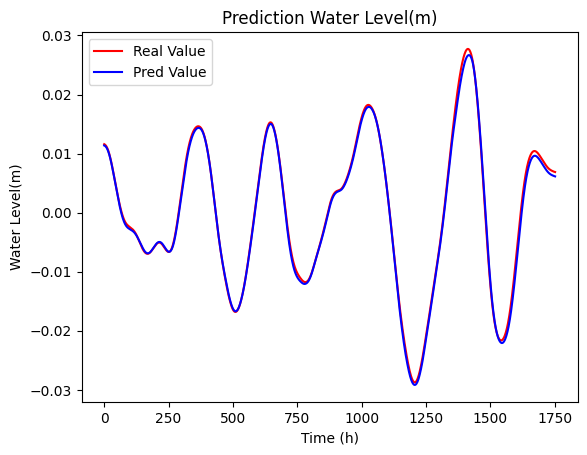

MSE: 3.4178741298436486e-07
MAE: 0.00043538718824742033
R²: 0.997894942205748
RMSE: 0.0005846258743712639
pred_finally: [0.01137252 0.01135633 0.01133466 ... 0.00616735 0.00615419 0.00614243]
prediction_result: [0.01137252 0.01135633 0.01133466 ... 0.00616735 0.00615419 0.00614243]
lstm_y_turs: [0.01159903 0.01157905 0.01155336 ... 0.00690326 0.00689075 0.00687973]
-------------------------- 9 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 9 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0567 - val_loss: 0.0077
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 3.4282e-04 - val_loss: 8.2369e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 2.1552e-04 - val_loss: 4.8895e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 1.5248e-04 - val_loss: 3.0240e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0724e-04 - val_loss: 1.8266e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 7.6355e-05 - val_loss: 1.2916e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 5.5271e-05 - val_loss: 9.8934e-05
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 4.1955e-05 - val_loss: 8.3585e-05
Epoch 10/30
110/110 [==============================] - 

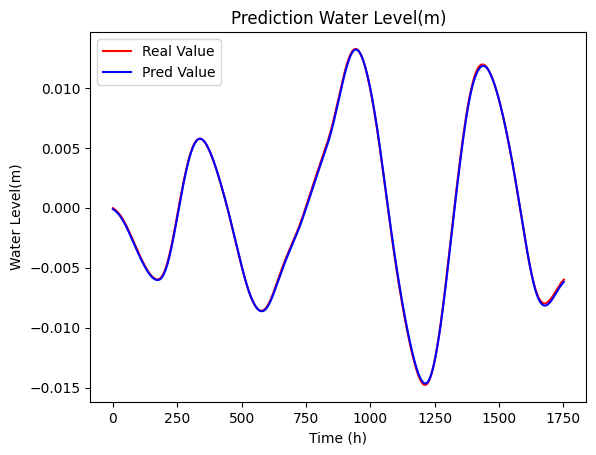

MSE: 1.57027573367496e-08
MAE: 0.00010627790580643286
R²: 0.9997004850664669
RMSE: 0.00012531064334983522
pred_finally: [-0.00011696 -0.00013033 -0.0001442  ... -0.00622237 -0.00619876
 -0.00617584]
prediction_result: [-0.00011696 -0.00013033 -0.0001442  ... -0.00622237 -0.00619876
 -0.00617584]
lstm_y_turs: [-3.54945373e-05 -4.83964168e-05 -6.17971893e-05 ... -6.03997249e-03
 -6.01749292e-03 -5.99570097e-03]
-------------------------- 10 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 10 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0712 - val_loss: 0.0174
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 2.4889e-04 - val_loss: 0.0021
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 1.8291e-04 - val_loss: 0.0015
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 1.4502e-04 - val_loss: 0.0011
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 1.1973e-04 - val_loss: 9.4008e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 9.5732e-05 - val_loss: 8.1994e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 8.1245e-05 - val_loss: 9.0727e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 7.1102e-05 - val_loss: 7.5420e-04
Epoch 10/30
110/110 [==============================] - 0s 3ms/step 

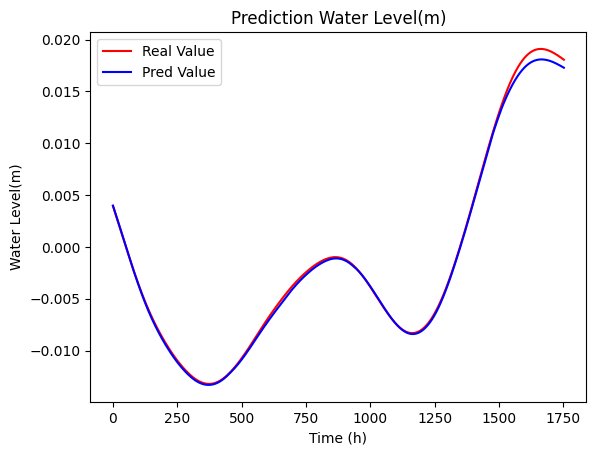

MSE: 1.259215206644017e-07
MAE: 0.00023598777727726642
R²: 0.9986074450649373
RMSE: 0.0003548542245266381
pred_finally: [0.00398243 0.00390655 0.00383057 ... 0.01731605 0.01730149 0.01728686]
prediction_result: [0.00398243 0.00390655 0.00383057 ... 0.01731605 0.01730149 0.01728686]
lstm_y_turs: [0.00394529 0.00386792 0.00379045 ... 0.01809421 0.01807585 0.01805741]
-------------------------- 11 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 11 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0912 - val_loss: 0.0058
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 6.1726e-04 - val_loss: 0.0029
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 3.4707e-04 - val_loss: 0.0026
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 2.1892e-04 - val_loss: 0.0024
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 1.3616e-04 - val_loss: 0.0021
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 8.0293e-05 - val_loss: 0.0019
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 4.6974e-05 - val_loss: 0.0017
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 2.7340e-05 - val_loss: 0.0016
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 1.6965e-05 - val_loss: 0.0015
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 1.15

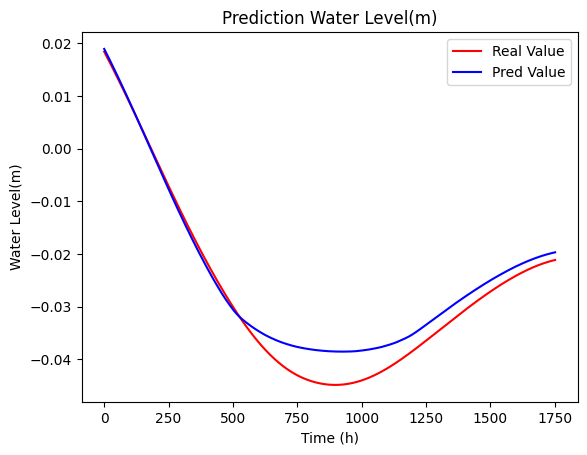

MSE: 1.078205149503607e-05
MAE: 0.002619387138065398
R²: 0.9604949114736803
RMSE: 0.0032836034314508915
pred_finally: [ 0.01894934  0.0188535   0.01875749 ... -0.01970803 -0.01969724
 -0.01968655]
prediction_result: [ 0.01894934  0.0188535   0.01875749 ... -0.01970803 -0.01969724
 -0.01968655]
lstm_y_turs: [ 0.01842047  0.01832746  0.01823433 ... -0.02116324 -0.02115159
 -0.02114005]
-------------------------- 12 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 12 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0838 - val_loss: 0.0253
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 5.6892e-04 - val_loss: 0.0168
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 2.0168e-04 - val_loss: 0.0124
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 1.3421e-04 - val_loss: 0.0108
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 1.0095e-04 - val_loss: 0.0085
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 7.5067e-05 - val_loss: 0.0073
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 5.8175e-05 - val_loss: 0.0065
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 4.8082e-05 - val_loss: 0.0057
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 3.9488e-05 - val_loss: 0.0048
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 3.35

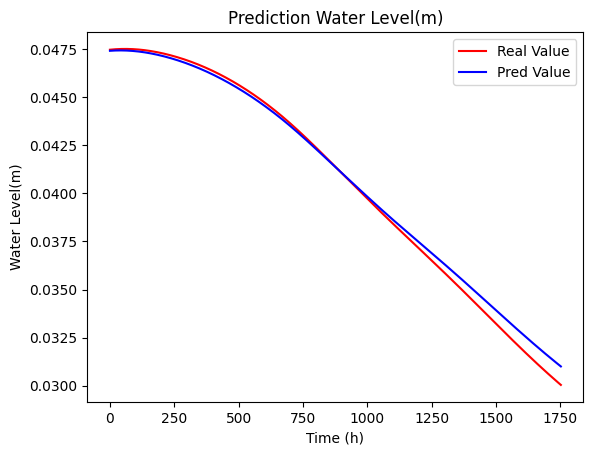

MSE: 1.655394046049963e-07
MAE: 0.00030396694025003215
R²: 0.9947653106347928
RMSE: 0.00040686533964568215
pred_finally: [0.04742023 0.04742122 0.04742218 ... 0.03102108 0.03101037 0.03099966]
prediction_result: [0.04742023 0.04742122 0.04742218 ... 0.03102108 0.03101037 0.03099966]
lstm_y_turs: [0.0474772  0.04747861 0.04747998 ... 0.03006073 0.03004923 0.03003775]
-------------------------- 13 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 13 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0615 - val_loss: 0.0321
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 7.5119e-04
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 2.5202e-05 - val_loss: 3.6057e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 1.7468e-05 - val_loss: 4.1837e-04
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 1.5751e-05 - val_loss: 4.1519e-04
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 1.4525e-05 - val_loss: 4.6435e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 1.3475e-05 - val_loss: 4.4567e-04
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 1.2543e-05 - val_loss: 4.4752e-04
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 1.1575e-05 - val_loss: 5.1490e-04
Epoch 10/30
110/110 [==============================

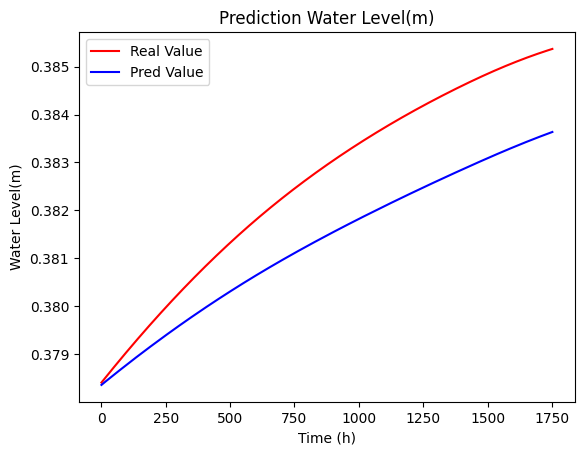

MSE: 1.8877978800354463e-06
MAE: 0.0012762381550685997
R²: 0.5290685128291096
RMSE: 0.001373971571771209
pred_finally: [0.37835756 0.37836218 0.3783668  ... 0.38363254 0.3836345  0.38363647]
prediction_result: [0.37835756 0.37836218 0.3783668  ... 0.38363254 0.3836345  0.38363647]
lstm_y_turs: [0.37840647 0.37841316 0.37841985 ... 0.38536623 0.38536792 0.3853696 ]
CPU times: total: 1h 27min 5s
Wall time: 22min 47s


In [6]:
%%time
import tensorflow as tf

# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []
#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
        # optimizer = Adam()  # 设置为您希望的学习率
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model


    N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=N_LSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

### StackLSTM

CPU times: total: 0 ns
Wall time: 0 ns
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
-------------------------- 0 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 0 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 2s 4ms/step - loss: 0.0528 - val_loss: 0.0017
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 9.8266e-04 - val_loss: 0.0011
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 9.5046e-04 - val_loss: 0.0010
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 9.5098e-04 - val_loss: 0.0010
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 9.2929e-04 - 

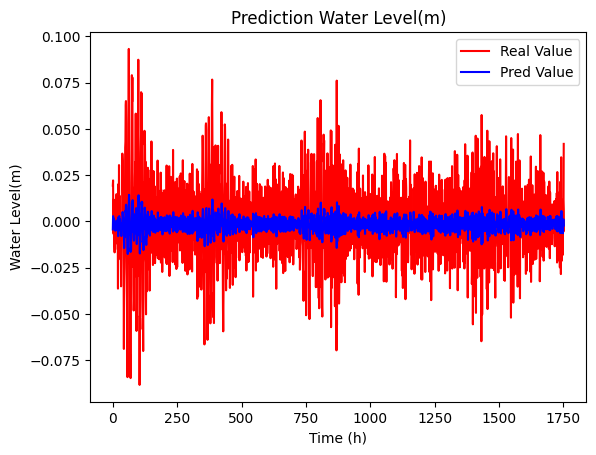

MSE: 0.00048154023416322665
MAE: 0.01708576236119286
R²: -0.009673615152254511
RMSE: 0.021944025021933114
pred_finally: [-0.00433854  0.00284617  0.00028553 ...  0.00047374  0.00112371
 -0.00224868]
prediction_result: [-0.00433854  0.00284617  0.00028553 ...  0.00047374  0.00112371
 -0.00224868]
lstm_y_turs: [ 0.01935259  0.02213772 -0.00627413 ...  0.00657959 -0.00548436
  0.04189374]
-------------------------- 1 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 1 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 4ms/step - loss: 0.0411 - val_loss: 4.5784e-04
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 4.0580e-04 - val_loss: 4.3379e-04
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 3.9811e-04 - val_loss: 4.2867e-04
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 3.9225e-04 - val_loss: 4.2073e-04
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 3.8978e-04 - val_loss: 4.1351e-04
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 3.7720e-04 - val_loss: 4.0178e-04
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 3.6549e-04 - val_loss: 3.8196e-04
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 3.4804e-04 - val_loss: 3.6967e-04
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 3.3311e-04 - val_loss: 3.4810e-04
Epoch 10/30
110/110 [======================

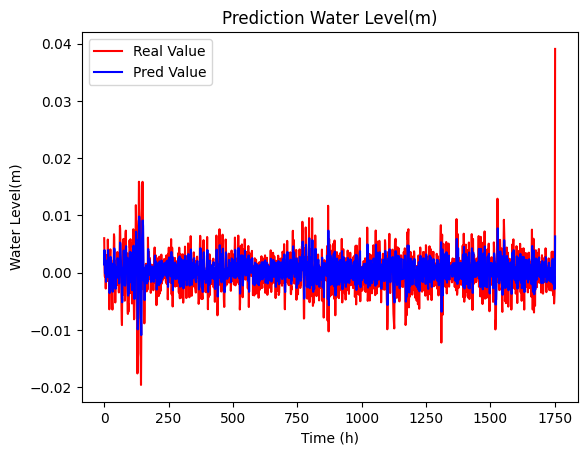

MSE: 9.305507282643863e-06
MAE: 0.002334056388603286
R²: 0.2750716949965505
RMSE: 0.0030504929573175322
pred_finally: [ 0.00145308  0.00395261  0.00218912 ... -0.00272633 -0.00224419
  0.00633922]
prediction_result: [ 0.00145308  0.00395261  0.00218912 ... -0.00272633 -0.00224419
  0.00633922]
lstm_y_turs: [ 0.00602579  0.00311664 -0.00040043 ... -0.00353838  0.00971867
  0.03905641]
-------------------------- 2 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 2 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 4ms/step - loss: 0.0772 - val_loss: 0.0100
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0051
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 11/3

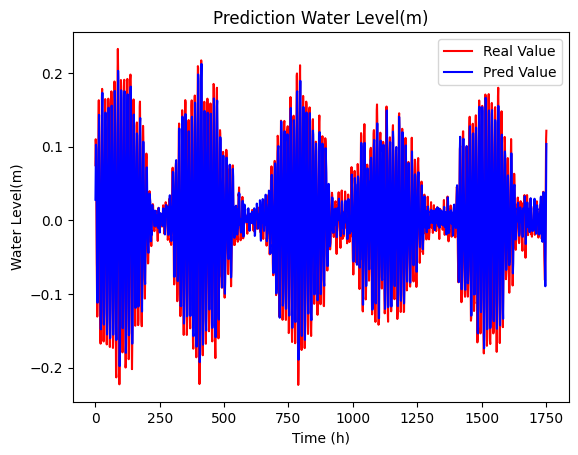

MSE: 0.0016818279113191604
MAE: 0.03195494666915918
R²: 0.75371846786882
RMSE: 0.0410100952366507
pred_finally: [ 0.02800383  0.07032052  0.10267826 ... -0.0025569   0.05567494
  0.10363825]
prediction_result: [ 0.02800383  0.07032052  0.10267826 ... -0.0025569   0.05567494
  0.10363825]
lstm_y_turs: [0.07479785 0.11011702 0.10247981 ... 0.06663579 0.10985025 0.12167445]
-------------------------- 3 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 3 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 4ms/step - loss: 0.0692 - val_loss: 0.0098
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0027
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 11/3

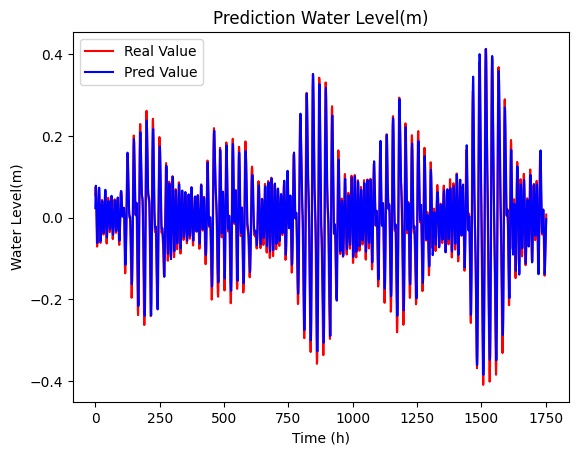

MSE: 0.0015581721592416498
MAE: 0.03224932009583644
R²: 0.898507644320724
RMSE: 0.03947368945565704
pred_finally: [ 0.0232691   0.05877507  0.07812274 ... -0.05017035 -0.02380292
 -0.0037821 ]
prediction_result: [ 0.0232691   0.05877507  0.07812274 ... -0.05017035 -0.02380292
 -0.0037821 ]
lstm_y_turs: [ 0.05415091  0.07486614  0.07087559 ... -0.03213811 -0.0074835
  0.00763638]
-------------------------- 4 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 4 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0878 - val_loss: 0.0101
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0074
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0047
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0047
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0046
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0044
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0044
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 11/3

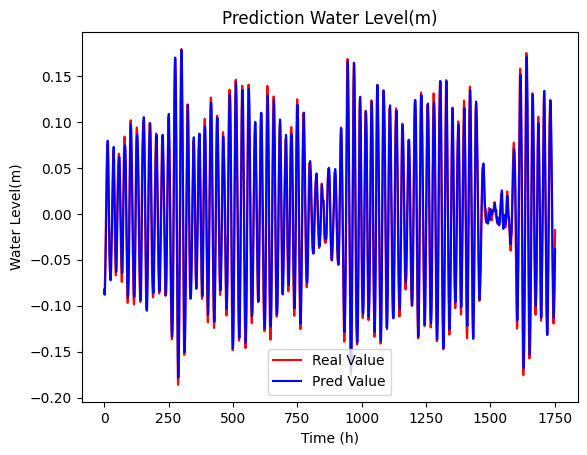

MSE: 0.0005421287344651681
MAE: 0.019789774244146442
R²: 0.9141510674888395
RMSE: 0.023283658098872007
pred_finally: [-0.08242174 -0.08748861 -0.08811781 ... -0.0755656  -0.05743927
 -0.03847637]
prediction_result: [-0.08242174 -0.08748861 -0.08811781 ... -0.0755656  -0.05743927
 -0.03847637]
lstm_y_turs: [-0.08635675 -0.08601982 -0.08061906 ... -0.06512362 -0.04250088
 -0.01775367]
-------------------------- 5 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 5 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 4ms/step - loss: 0.0603 - val_loss: 0.0082
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 9.4530e-04
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 3.6005e-04 - val_loss: 7.5854e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 3.0273e-04 - val_loss: 5.6300e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 2.8803e-04 - val_loss: 6.2409e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 2.8582e-04 - val_loss: 5.0537e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 2.6861e-04 - val_loss: 5.0812e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 2.6952e-04 - val_loss: 5.0679e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 2.7010e-04 - val_loss: 4.9770e-04
Epoch 10/30
110/110 [==============================

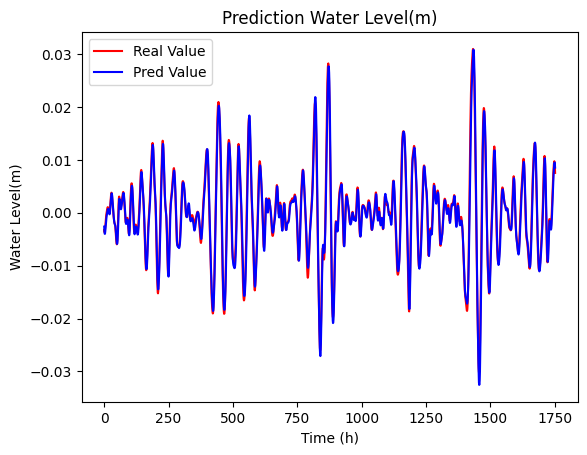

MSE: 1.9987292521016095e-06
MAE: 0.0010688733576420665
R²: 0.9713212512622394
RMSE: 0.0014137642137575874
pred_finally: [-0.00262372 -0.00355213 -0.00399641 ...  0.00950858  0.0092791
  0.00852808]
prediction_result: [-0.00262372 -0.00355213 -0.00399641 ...  0.00950858  0.0092791
  0.00852808]
lstm_y_turs: [-0.00324769 -0.00368721 -0.00365793 ...  0.00950843  0.00878657
  0.00752471]
-------------------------- 6 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 6 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0530 - val_loss: 0.0129
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0088
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 4.2837e-04 - val_loss: 0.0029
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 1.8534e-04 - val_loss: 0.0022
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 8.2905e-05 - val_loss: 0.0019
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 4.7705e-05 - val_loss: 0.0018
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 3.6932e-05 - val_loss: 0.0018
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 3.4824e-05 - val_loss: 0.0018
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 3.4416e-05 -

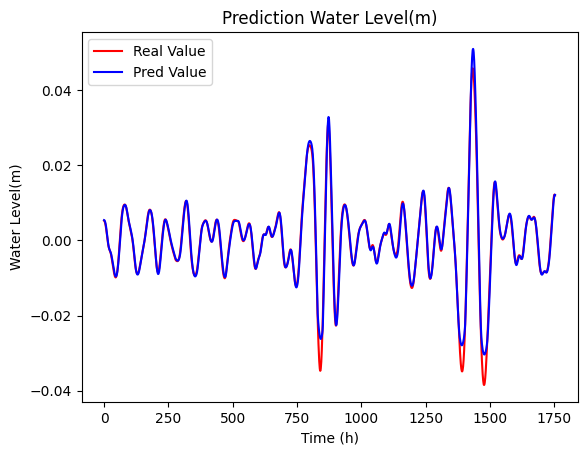

MSE: 2.1887691955906546e-06
MAE: 0.0007888140795462295
R²: 0.9826693101605151
RMSE: 0.001479448949977881
pred_finally: [0.00542949 0.00540208 0.0053192  ... 0.0120612  0.01220102 0.01216021]
prediction_result: [0.00542949 0.00540208 0.0053192  ... 0.0120612  0.01220102 0.01216021]
lstm_y_turs: [0.00526768 0.00521012 0.00509492 ... 0.01224018 0.01220006 0.01198972]
-------------------------- 7 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 7 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 2s 5ms/step - loss: 0.0688 - val_loss: 0.0074
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 5.4386e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.1753e-04 - val_loss: 4.1541e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 7.2551e-05 - val_loss: 3.4582e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 6.7184e-05 - val_loss: 3.4506e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 6.4040e-05 - val_loss: 3.2934e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 6.0852e-05 - val_loss: 3.4556e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 5.6412e-05 - val_loss: 2.8953e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 5.3364e-05 - val_loss: 2.6760e-04
Epoch 10/30
110/110 [===================

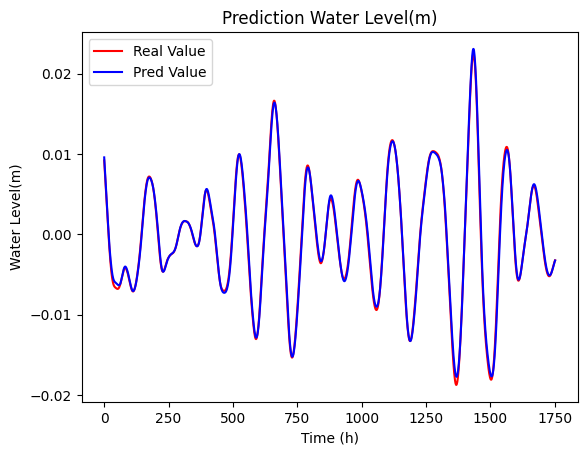

MSE: 1.8030613931657605e-07
MAE: 0.0003262514899176525
R²: 0.9969449456892326
RMSE: 0.00042462470408182335
pred_finally: [ 0.00957854  0.00900837  0.00843676 ... -0.0034325  -0.0033379
 -0.00325493]
prediction_result: [ 0.00957854  0.00900837  0.00843676 ... -0.0034325  -0.0033379
 -0.00325493]
lstm_y_turs: [ 0.00919664  0.00864159  0.00808506 ... -0.00338509 -0.00330145
 -0.00323046]
-------------------------- 8 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 8 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0757 - val_loss: 0.0332
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0052
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 3.1913e-04 - val_loss: 0.0030
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 2.0297e-04 - val_loss: 0.0027
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 1.6320e-04 - val_loss: 0.0025
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 1.4054e-04 - val_loss: 0.0024
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0751e-04 - val_loss: 0.0023
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 7.9781e-05 - val_loss: 0.0021
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 5.8270e-05 - val_loss: 0.0020
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 4.0248e-

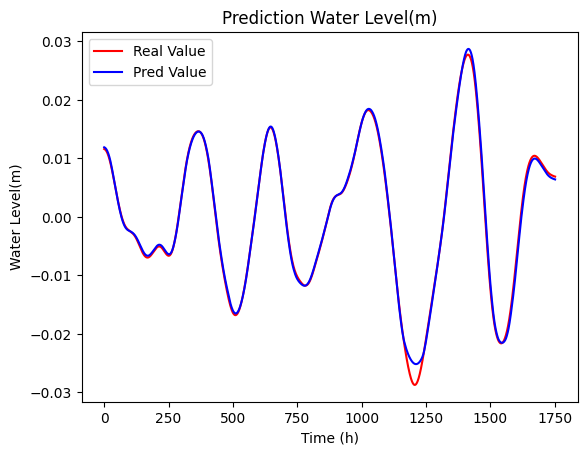

MSE: 4.6777069935305033e-07
MAE: 0.00041429917187651153
R²: 0.9971190151562401
RMSE: 0.000683937642883509
pred_finally: [0.01188965 0.01187169 0.01184811 ... 0.00641798 0.00640495 0.00639333]
prediction_result: [0.01188965 0.01187169 0.01184811 ... 0.00641798 0.00640495 0.00639333]
lstm_y_turs: [0.01159903 0.01157905 0.01155336 ... 0.00690326 0.00689075 0.00687973]
-------------------------- 9 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 9 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0768 - val_loss: 0.0069
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 4.6852e-04
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 4.4396e-04 - val_loss: 2.9448e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 1.4454e-04 - val_loss: 2.6043e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 6.0121e-05 - val_loss: 2.5057e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 3.5806e-05 - val_loss: 2.0233e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 2.3142e-05 - val_loss: 1.8982e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 1.8048e-05 - val_loss: 1.8731e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 1.5378e-05 - val_loss: 1.8386e-04
Epoch 10/30
110/110 [==============================

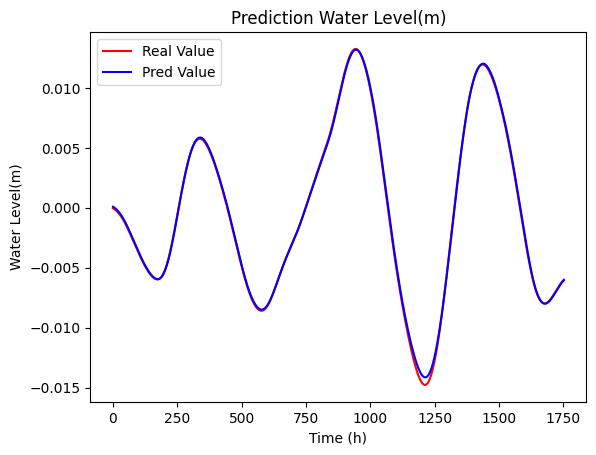

MSE: 3.301266677594814e-08
MAE: 0.00013127268418895122
R²: 0.9993703152584541
RMSE: 0.0001816938820542622
pred_finally: [ 8.3797691e-05  7.1279173e-05  5.8231286e-05 ... -6.0985624e-03
 -6.0755969e-03 -6.0533471e-03]
prediction_result: [ 8.3797691e-05  7.1279173e-05  5.8231286e-05 ... -6.0985624e-03
 -6.0755969e-03 -6.0533471e-03]
lstm_y_turs: [-3.54945373e-05 -4.83964168e-05 -6.17971893e-05 ... -6.03997249e-03
 -6.01749292e-03 -5.99570097e-03]
-------------------------- 10 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 10 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0909 - val_loss: 0.0089
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 3.5007e-04 - val_loss: 0.0012
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 1.7782e-04 - val_loss: 8.2372e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 9.5599e-05 - val_loss: 6.6193e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 4.7062e-05 - val_loss: 6.5208e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 2.3449e-05 - val_loss: 5.5602e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 1.3270e-05 - val_loss: 5.4213e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0076e-05 - val_loss: 4.7873e-04
Epoch 10/30
110/110 [==============================] - 0s 3

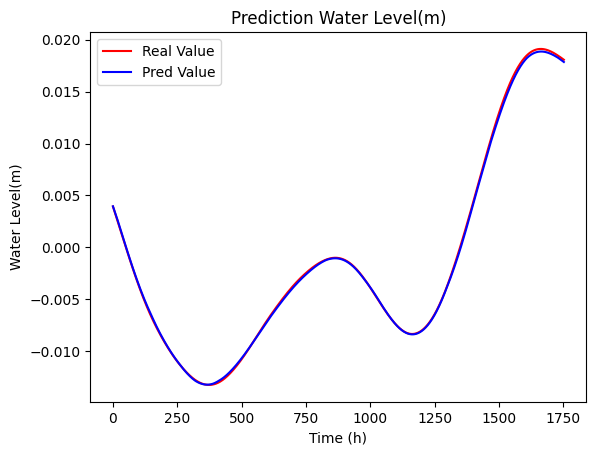

MSE: 2.3329561858541346e-08
MAE: 0.0001203100178831118
R²: 0.9997420004433909
RMSE: 0.0001527401776172247
pred_finally: [0.00395855 0.00388672 0.00381483 ... 0.01787941 0.01786053 0.01784158]
prediction_result: [0.00395855 0.00388672 0.00381483 ... 0.01787941 0.01786053 0.01784158]
lstm_y_turs: [0.00394529 0.00386792 0.00379045 ... 0.01809421 0.01807585 0.01805741]
-------------------------- 11 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 11 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.1220 - val_loss: 0.0143
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 4.7902e-04 - val_loss: 0.0052
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 8.5836e-05 - val_loss: 0.0040
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 4.6178e-05 - val_loss: 0.0035
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 2.8969e-05 - val_loss: 0.0033
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 2.0693e-05 - val_loss: 0.0031
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 1.5853e-05 - val_loss: 0.0030
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 1.2357e-05 - val_loss: 0.0030
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 9.4729e-06 - val_loss: 0.0029
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 7.00

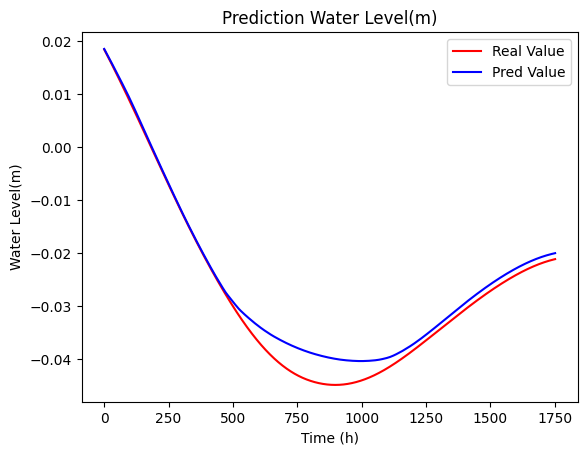

MSE: 6.2648936195473796e-06
MAE: 0.0018573762710290106
R²: 0.9770456320708412
RMSE: 0.0025029769514614752
pred_finally: [ 0.01851953  0.01842914  0.01833865 ... -0.02003607 -0.02002525
 -0.02001454]
prediction_result: [ 0.01851953  0.01842914  0.01833865 ... -0.02003607 -0.02002525
 -0.02001454]
lstm_y_turs: [ 0.01842047  0.01832746  0.01823433 ... -0.02116324 -0.02115159
 -0.02114005]
-------------------------- 12 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 12 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.1022 - val_loss: 0.0211
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 2.7669e-04 - val_loss: 0.0242
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.6161e-04 - val_loss: 0.0190
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 1.1583e-04 - val_loss: 0.0161
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 7.7842e-05 - val_loss: 0.0126
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 4.4461e-05 - val_loss: 0.0101
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5812e-05 - val_loss: 0.0081
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 1.7992e-05 - val_loss: 0.0070
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 1.4519e-05 - val_loss: 0.0061
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 1.27

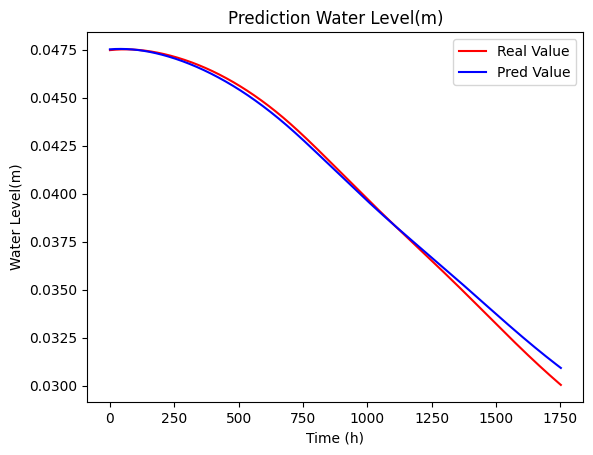

MSE: 1.0726335637009816e-07
MAE: 0.00024373206723970586
R²: 0.9966081166462645
RMSE: 0.00032751084924029336
pred_finally: [0.04751933 0.04752036 0.04752136 ... 0.03094122 0.03093105 0.03092089]
prediction_result: [0.04751933 0.04752036 0.04752136 ... 0.03094122 0.03093105 0.03092089]
lstm_y_turs: [0.0474772  0.04747861 0.04747998 ... 0.03006073 0.03004923 0.03003775]
-------------------------- 13 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 13 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_3880\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0939 - val_loss: 0.0100
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 6.4027e-04 - val_loss: 2.3922e-04
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0407e-04 - val_loss: 9.1202e-05
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 7.9898e-05 - val_loss: 2.6433e-05
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 5.8261e-05 - val_loss: 4.0177e-06
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 4.1193e-05 - val_loss: 1.4275e-05
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 2.8703e-05 - val_loss: 6.3995e-05
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 2.0125e-05 - val_loss: 1.0567e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 1.5586e-05 - val_loss: 1.4413e-04
Epoch 10/30
110/110 [==========================

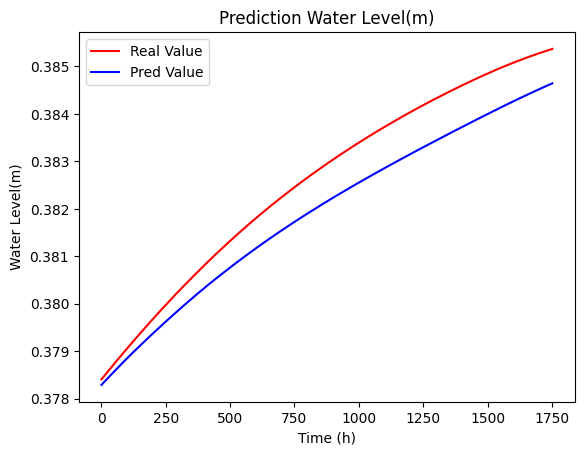

MSE: 4.984092384878276e-07
MAE: 0.0006681463158369682
R²: 0.8756664543471272
RMSE: 0.0007059810468332897
pred_finally: [0.37828898 0.3782948  0.37830055 ... 0.38463968 0.38464203 0.3846444 ]
prediction_result: [0.37828898 0.3782948  0.37830055 ... 0.38463968 0.38464203 0.3846444 ]
lstm_y_turs: [0.37840647 0.37841316 0.37841985 ... 0.38536623 0.38536792 0.3853696 ]


In [5]:
%time
# def Stack_LSTM():
#         model = Sequential()
#         model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
#         model.add(LSTM(100, activation='relu'))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Two = 'Stack_LSTM_Model'
#     Stack_LSTM_Model.fit(trainX,trainY)
#     Result_Ana(Stack_LSTM_Model,6,Model_Name_Two)
#
#     #BiLSTM
#     def BiLSTM():
#         model = Sequential()
#         model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
#     BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Three = 'BiLSTM_Model'
#     BiLSTM_Model.fit(trainX,trainY)
#     Result_Ana(BiLSTM_Model,6,Model_Name_Three)

import tensorflow as tf

# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []
#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    # def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    #     model = Sequential()
    #     model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
    #     # optimizer = Adam()  # 设置为您希望的学习率
    #     model.add(Dense(1))
    #     model.compile(optimizer=optimizer, loss='mse')
    #     return model
    def Stack_LSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
        model.add(LSTM(100, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model
    Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    # N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=Stack_LSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

## BiLSTM

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
-------------------------- 0 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 0 ------------------------------


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 2s 5ms/step - loss: 0.0277 - val_loss: 0.0019
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 9.9391e-04 - val_loss: 0.0011
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 9.7127e-04 - val_loss: 0.0011
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 9.5933e-04 - val_loss: 0.0011
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 9.5695e-04 - val_loss: 0.0010
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 9.4401e-04 - val_loss: 0.0010
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 9.332

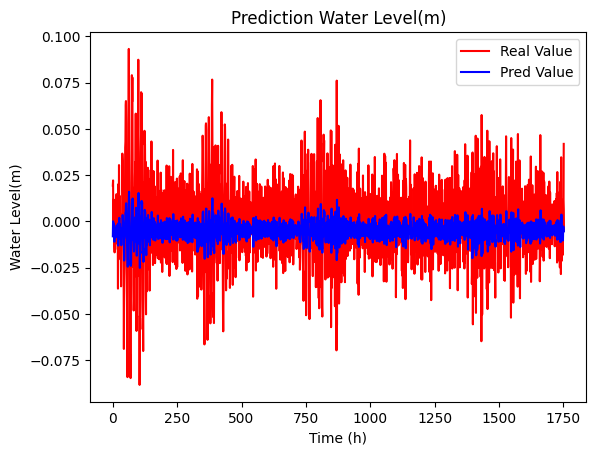

MSE: 0.0005079421245070961
MAE: 0.01766837257969937
R²: -0.06503200512494378
RMSE: 0.022537571397714885
pred_finally: [-8.0587929e-03  5.0352577e-05 -8.8229630e-04 ... -2.8976456e-03
 -2.7745585e-03 -5.3700698e-03]
prediction_result: [-8.0587929e-03  5.0352577e-05 -8.8229630e-04 ... -2.8976456e-03
 -2.7745585e-03 -5.3700698e-03]
lstm_y_turs: [ 0.01935259  0.02213772 -0.00627413 ...  0.00657959 -0.00548436
  0.04189374]
-------------------------- 1 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 1 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 5ms/step - loss: 0.0143 - val_loss: 4.6306e-04
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 4.1199e-04 - val_loss: 4.5122e-04
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 3.9846e-04 - val_loss: 4.3849e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 3.8631e-04 - val_loss: 4.1290e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 3.6521e-04 - val_loss: 3.8960e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 3.5116e-04 - val_loss: 3.6919e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 3.2783e-04 - val_loss: 3.4855e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 3.1060e-04 - val_loss: 3.3766e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 2.9689e-04 - val_loss: 3.2707e-04
Epoch 10/30
110/110 [======================

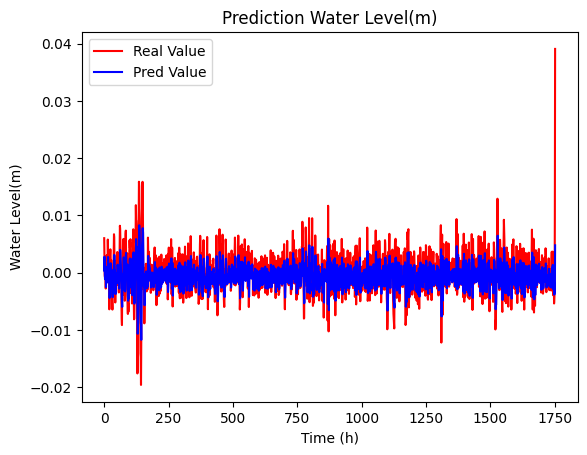

MSE: 9.835418747641695e-06
MAE: 0.0023955152655943815
R²: 0.23378992405653254
RMSE: 0.0031361471183032367
pred_finally: [ 0.00038949  0.00279058  0.00109188 ... -0.00351798 -0.00305065
  0.00478238]
prediction_result: [ 0.00038949  0.00279058  0.00109188 ... -0.00351798 -0.00305065
  0.00478238]
lstm_y_turs: [ 0.00602579  0.00311664 -0.00040043 ... -0.00353838  0.00971867
  0.03905641]
-------------------------- 2 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 2 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 3s 6ms/step - loss: 0.0326 - val_loss: 0.0081
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0059 - val_loss: 0.0046
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 10/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 11/3

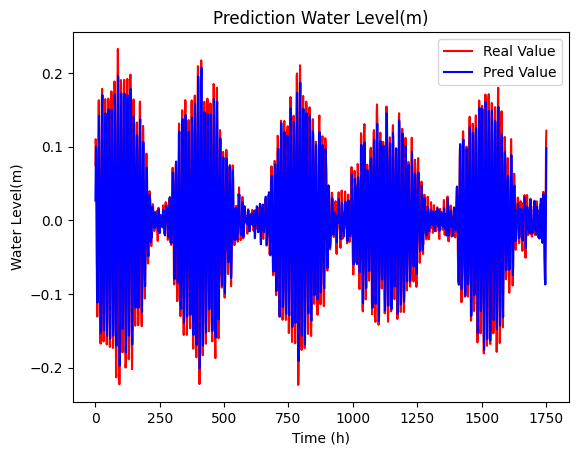

MSE: 0.001669260651451773
MAE: 0.031833896240111674
R²: 0.7555587774474636
RMSE: 0.04085658639010084
pred_finally: [ 0.02689786  0.06861617  0.09957459 ... -0.00379022  0.05422983
  0.09820182]
prediction_result: [ 0.02689786  0.06861617  0.09957459 ... -0.00379022  0.05422983
  0.09820182]
lstm_y_turs: [0.07479785 0.11011702 0.10247981 ... 0.06663579 0.10985025 0.12167445]
-------------------------- 3 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 3 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 5ms/step - loss: 0.0346 - val_loss: 0.0061
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 11/3

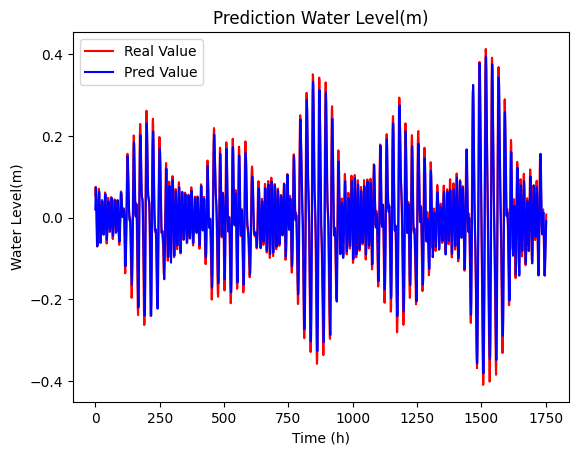

MSE: 0.0015659039459641755
MAE: 0.0317814984599529
R²: 0.8980040303629052
RMSE: 0.03957150421659727
pred_finally: [ 0.0198403   0.05389688  0.07455099 ... -0.05576642 -0.02851859
 -0.00857801]
prediction_result: [ 0.0198403   0.05389688  0.07455099 ... -0.05576642 -0.02851859
 -0.00857801]
lstm_y_turs: [ 0.05415091  0.07486614  0.07087559 ... -0.03213811 -0.0074835
  0.00763638]
-------------------------- 4 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 4 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 6ms/step - loss: 0.0448 - val_loss: 0.0103
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0070
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0051
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0047
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 11/3

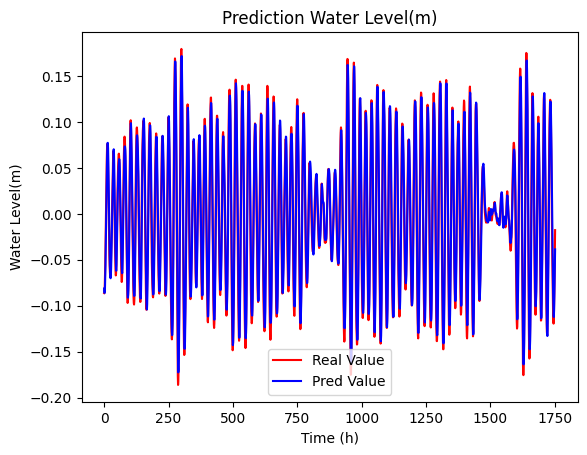

MSE: 0.0005043438795901277
MAE: 0.019052671967603626
R²: 0.9201344977147091
RMSE: 0.022457601821880443
pred_finally: [-0.08123554 -0.085878   -0.086091   ... -0.07497019 -0.05805165
 -0.03872476]
prediction_result: [-0.08123554 -0.085878   -0.086091   ... -0.07497019 -0.05805165
 -0.03872476]
lstm_y_turs: [-0.08635675 -0.08601982 -0.08061906 ... -0.06512362 -0.04250088
 -0.01775367]
-------------------------- 5 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 5 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 6ms/step - loss: 0.0253 - val_loss: 0.0067
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 3.3866e-04 - val_loss: 5.0688e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 2.6368e-04 - val_loss: 4.7176e-04
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 2.5301e-04 - val_loss: 4.3832e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 2.4995e-04 - val_loss: 4.6820e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5000e-04 - val_loss: 4.4809e-04
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 2.5981e-04 - val_loss: 4.3962e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5504e-04 - val_loss: 4.2247e-04
Epoch 10/30
110/110 [==============================] - 

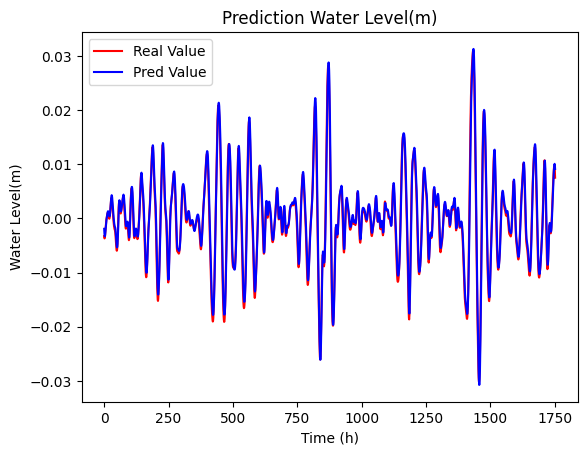

MSE: 1.9258391046758965e-06
MAE: 0.0010633245199526845
R²: 0.9723671148884822
RMSE: 0.0013877460519403024
pred_finally: [-0.00192037 -0.0028424  -0.00328873 ...  0.01008735  0.0098654
  0.00913643]
prediction_result: [-0.00192037 -0.0028424  -0.00328873 ...  0.01008735  0.0098654
  0.00913643]
lstm_y_turs: [-0.00324769 -0.00368721 -0.00365793 ...  0.00950843  0.00878657
  0.00752471]
-------------------------- 6 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 6 ------------------------------


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 2s 5ms/step - loss: 0.0208 - val_loss: 0.0095
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 3.6692e-04 - val_loss: 0.0024
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 1.2533e-04 - val_loss: 0.0015
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 4.7983e-05 - val_loss: 0.0013
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.4119e-05 - val_loss: 0.0012
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 3.2065e-05 - val_loss: 0.0012
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 3.0877e-05 - val_loss: 0.0012
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 3.0460e-05 - val_loss: 0.0012
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - los

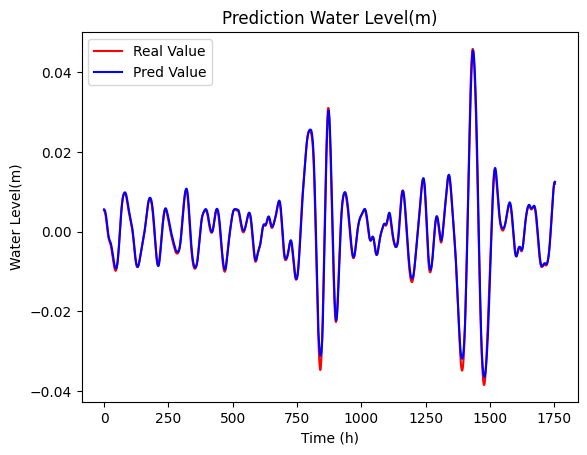

MSE: 9.880322407864338e-07
MAE: 0.0006774865309283481
R²: 0.9921767537888525
RMSE: 0.0009939981090457033
pred_finally: [0.00559513 0.00557154 0.00548904 ... 0.01242755 0.01256294 0.01252073]
prediction_result: [0.00559513 0.00557154 0.00548904 ... 0.01242755 0.01256294 0.01252073]
lstm_y_turs: [0.00526768 0.00521012 0.00509492 ... 0.01224018 0.01220006 0.01198972]
-------------------------- 7 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 7 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 3s 8ms/step - loss: 0.0350 - val_loss: 0.0053
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0016 - val_loss: 7.6012e-04
Epoch 3/30
110/110 [==============================] - 1s 5ms/step - loss: 1.8739e-04 - val_loss: 2.0230e-04
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 4.7271e-05 - val_loss: 1.6163e-04
Epoch 5/30
110/110 [==============================] - 1s 6ms/step - loss: 3.6857e-05 - val_loss: 1.4617e-04
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 3.3359e-05 - val_loss: 1.4361e-04
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 3.1807e-05 - val_loss: 1.3461e-04
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 3.2394e-05 - val_loss: 1.3339e-04
Epoch 9/30
110/110 [==============================] - 1s 5ms/step - loss: 2.9745e-05 - val_loss: 1.2696e-04
Epoch 10/30
110/110 [==============================

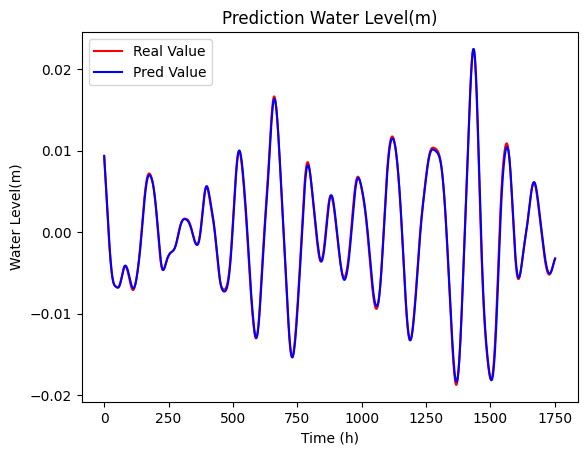

MSE: 1.5424622255146083e-07
MAE: 0.000309167121317586
R²: 0.9973864972711881
RMSE: 0.00039274192869040713
pred_finally: [ 0.00935554  0.00881485  0.00827279 ... -0.00342922 -0.00333587
 -0.00325386]
prediction_result: [ 0.00935554  0.00881485  0.00827279 ... -0.00342922 -0.00333587
 -0.00325386]
lstm_y_turs: [ 0.00919664  0.00864159  0.00808506 ... -0.00338509 -0.00330145
 -0.00323046]
-------------------------- 8 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 8 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 6ms/step - loss: 0.0377 - val_loss: 0.0271
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.3687e-04 - val_loss: 0.0014
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 4.9578e-05 - val_loss: 0.0012
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 3.8108e-05 - val_loss: 0.0012
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.5115e-05 - val_loss: 0.0011
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 3.2585e-05 - val_loss: 0.0011
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 3.1890e-05 - val_loss: 0.0011
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 3.1010e-05 - val_loss: 0.0010
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 2.9457e-

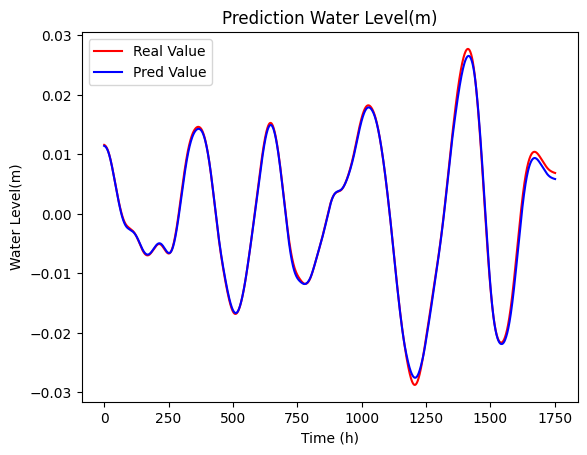

MSE: 3.200343105452879e-07
MAE: 0.00039459883037584634
R²: 0.9980289188710637
RMSE: 0.0005657157506604248
pred_finally: [0.01143196 0.01141616 0.01139492 ... 0.00588489 0.00587408 0.00586476]
prediction_result: [0.01143196 0.01141616 0.01139492 ... 0.00588489 0.00587408 0.00586476]
lstm_y_turs: [0.01159903 0.01157905 0.01155336 ... 0.00690326 0.00689075 0.00687973]
-------------------------- 9 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 9 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 6ms/step - loss: 0.0422 - val_loss: 0.0031
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 4.3792e-04 - val_loss: 7.2978e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.7577e-04 - val_loss: 3.1901e-04
Epoch 4/30
110/110 [==============================] - 1s 6ms/step - loss: 1.0881e-04 - val_loss: 1.6970e-04
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 6.6763e-05 - val_loss: 1.1504e-04
Epoch 6/30
110/110 [==============================] - 0s 5ms/step - loss: 3.9204e-05 - val_loss: 8.4239e-05
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 2.4842e-05 - val_loss: 7.4894e-05
Epoch 8/30
110/110 [==============================] - 0s 5ms/step - loss: 1.7293e-05 - val_loss: 6.5648e-05
Epoch 9/30
110/110 [==============================] - 1s 5ms/step - loss: 1.2278e-05 - val_loss: 5.7819e-05
Epoch 10/30
110/110 [==========================

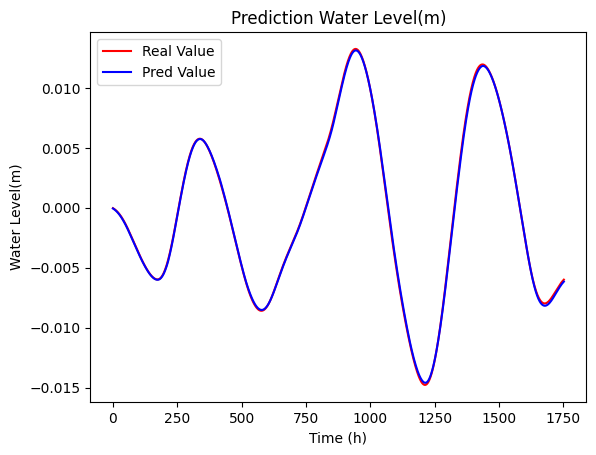

MSE: 1.792127058175859e-08
MAE: 0.00010581042656265172
R²: 0.9996581690685264
RMSE: 0.00013387034989779698
pred_finally: [-5.7719397e-05 -7.1456765e-05 -8.5690815e-05 ... -6.2033148e-03
 -6.1794198e-03 -6.1562303e-03]
prediction_result: [-5.7719397e-05 -7.1456765e-05 -8.5690815e-05 ... -6.2033148e-03
 -6.1794198e-03 -6.1562303e-03]
lstm_y_turs: [-3.54945373e-05 -4.83964168e-05 -6.17971893e-05 ... -6.03997249e-03
 -6.01749292e-03 -5.99570097e-03]
-------------------------- 10 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 10 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 5ms/step - loss: 0.0486 - val_loss: 0.0052
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 2.8604e-04 - val_loss: 0.0023
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.4682e-04 - val_loss: 0.0014
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 9.8609e-05 - val_loss: 0.0010
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 7.0178e-05 - val_loss: 8.6726e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 5.3888e-05 - val_loss: 7.4944e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 4.4567e-05 - val_loss: 7.2789e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 3.8216e-05 - val_loss: 7.0577e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 3.1649e-05 - val_loss: 7.5327e-04
Epoch 10/30
110/110 [==============================] - 0s 4

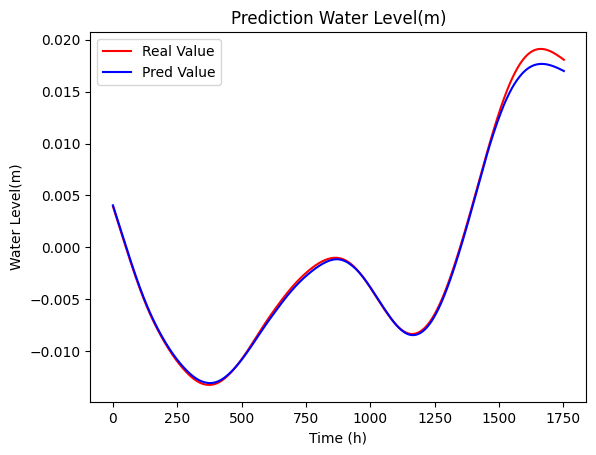

MSE: 2.328166465394143e-07
MAE: 0.0003018500682243317
R²: 0.9974253013433082
RMSE: 0.0004825107734956954
pred_finally: [0.00405465 0.00397781 0.00390087 ... 0.01699855 0.01698551 0.01697242]
prediction_result: [0.00405465 0.00397781 0.00390087 ... 0.01699855 0.01698551 0.01697242]
lstm_y_turs: [0.00394529 0.00386792 0.00379045 ... 0.01809421 0.01807585 0.01805741]
-------------------------- 11 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 11 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 6ms/step - loss: 0.0661 - val_loss: 0.0014
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 5.3594e-04 - val_loss: 0.0019
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 2.8565e-04 - val_loss: 0.0017
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 1.5278e-04 - val_loss: 0.0015
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 7.7124e-05 - val_loss: 0.0013
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.5001e-05 - val_loss: 0.0011
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 1.5684e-05 - val_loss: 0.0011
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 7.4796e-06 - val_loss: 0.0010
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 4.3352e-06 - val_loss: 9.7499e-04
Epoch 10/30
110/110 [==============================] - 1s 5ms/step - loss: 

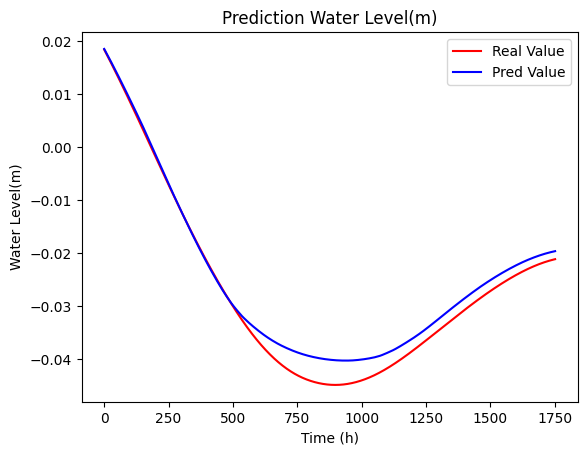

MSE: 6.317194083139467e-06
MAE: 0.0020264594793127384
R²: 0.9768540048610171
RMSE: 0.002513402889140431
pred_finally: [ 0.0185441   0.01845408  0.01836392 ... -0.01964772 -0.01963734
 -0.01962706]
prediction_result: [ 0.0185441   0.01845408  0.01836392 ... -0.01964772 -0.01963734
 -0.01962706]
lstm_y_turs: [ 0.01842047  0.01832746  0.01823433 ... -0.02116324 -0.02115159
 -0.02114005]
-------------------------- 12 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 12 ------------------------------


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 2s 7ms/step - loss: 0.0509 - val_loss: 0.0190
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 2.8735e-04 - val_loss: 0.0136
Epoch 3/30
110/110 [==============================] - 1s 5ms/step - loss: 1.4996e-04 - val_loss: 0.0111
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 8.9217e-05 - val_loss: 0.0088
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 5.6833e-05 - val_loss: 0.0073
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 3.8464e-05 - val_loss: 0.0064
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 2.8544e-05 - val_loss: 0.0056
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 2.1610e-05 - val_loss: 0.0051
Epoch 9/30
110/110 [==============================] - 1s 6ms/step - loss: 1.7468e-05 - val_loss: 0.0045
Epoch 10/30
110/110 [==============================] - 1s 5ms/step -

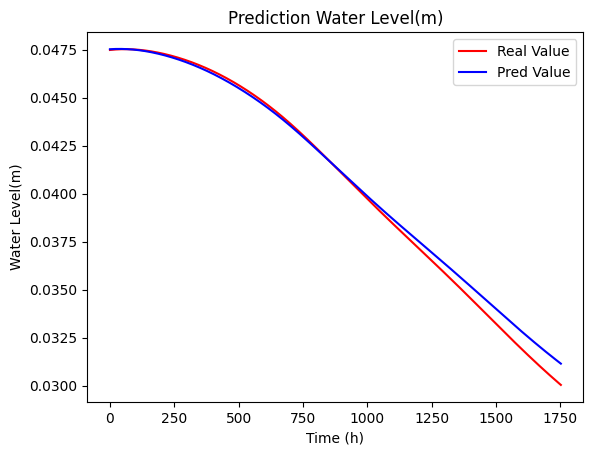

MSE: 1.9930839293008137e-07
MAE: 0.00030960010362694415
R²: 0.993697467214183
RMSE: 0.00044643968565762765
pred_finally: [0.04751578 0.04751665 0.0475175  ... 0.03116596 0.03115562 0.03114531]
prediction_result: [0.04751578 0.04751665 0.0475175  ... 0.03116596 0.03115562 0.03114531]
lstm_y_turs: [0.0474772  0.04747861 0.04747998 ... 0.03006073 0.03004923 0.03003775]
-------------------------- 13 --------------------------
1754
(7017, 6)
(1754, 6)
trainX.Shape:---- (7016, 1, 6)
trainY.shape:---- (7016,)
testX.shape:---- (1753, 1, 6)
testY.shape:---- (1753,)
---------------------------- 13 ------------------------------
Epoch 1/30


<timed exec>:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 5ms/step - loss: 0.0449 - val_loss: 0.0104
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 2.8049e-04 - val_loss: 6.2482e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.2078e-05 - val_loss: 6.1037e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 1.0207e-05 - val_loss: 6.4881e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 9.3755e-06 - val_loss: 6.4505e-04
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 8.8672e-06 - val_loss: 7.0226e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 8.4144e-06 - val_loss: 7.5842e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 8.0047e-06 - val_loss: 7.3898e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 7.6102e-06 - val_loss: 7.7093e-04
Epoch 10/30
110/110 [==========================

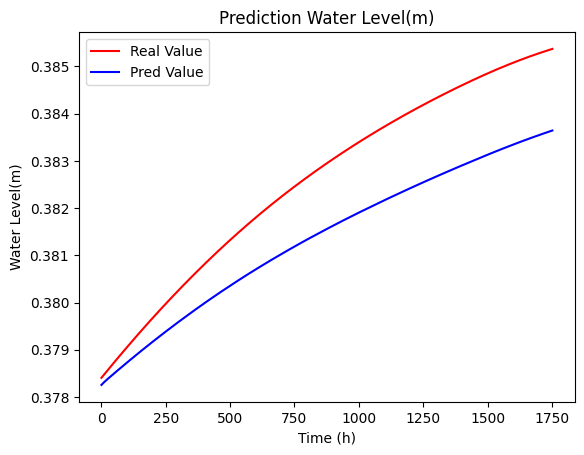

MSE: 1.757158738828056e-06
MAE: 0.0012367210576172162
R²: 0.5616578518161675
RMSE: 0.001325578643018986
pred_finally: [0.37825614 0.378262   0.37826785 ... 0.3836386  0.3836404  0.38364223]
prediction_result: [0.37825614 0.378262   0.37826785 ... 0.3836386  0.3836404  0.38364223]
lstm_y_turs: [0.37840647 0.37841316 0.37841985 ... 0.38536623 0.38536792 0.3853696 ]
CPU times: total: 2h 47min 40s
Wall time: 39min 23s


In [5]:
%%time
# def Stack_LSTM():
#         model = Sequential()
#         model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
#         model.add(LSTM(100, activation='relu'))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Two = 'Stack_LSTM_Model'
#     Stack_LSTM_Model.fit(trainX,trainY)
#     Result_Ana(Stack_LSTM_Model,6,Model_Name_Two)
#
#     #BiLSTM
#     def BiLSTM():
#         model = Sequential()
#         model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
#     BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Three = 'BiLSTM_Model'
#     BiLSTM_Model.fit(trainX,trainY)
#     Result_Ana(BiLSTM_Model,6,Model_Name_Three)

import tensorflow as tf

# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []
#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    # def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    #     model = Sequential()
    #     model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
    #     # optimizer = Adam()  # 设置为您希望的学习率
    #     model.add(Dense(1))
    #     model.compile(optimizer=optimizer, loss='mse')
    #     return model
    # def Stack_LSTM(optimizer='adam', batch_size=32, epochs=40):
    #     model = Sequential()
    #     model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
    #     model.add(LSTM(100, activation='relu'))
    #     model.add(Dense(1))
    #     model.compile(optimizer=optimizer, loss='mse')
    #     return model
    # Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))
    def BiLSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model
    # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
    BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    # N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=BiLSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

In [7]:
# WL(Water Level(m)) For IMF1-IMF13-R True Value
finally_y_true

[array([ 0.01935259,  0.02213772, -0.00627413, ...,  0.00657959,
        -0.00548436,  0.04189374]),
 array([ 0.00602579,  0.00311664, -0.00040043, ..., -0.00353838,
         0.00971867,  0.03905641]),
 array([0.07479785, 0.11011702, 0.10247981, ..., 0.06663579, 0.10985025,
        0.12167445]),
 array([ 0.05415091,  0.07486614,  0.07087559, ..., -0.03213811,
        -0.0074835 ,  0.00763638]),
 array([-0.08635675, -0.08601982, -0.08061906, ..., -0.06512362,
        -0.04250088, -0.01775367]),
 array([-0.00324769, -0.00368721, -0.00365793, ...,  0.00950843,
         0.00878657,  0.00752471]),
 array([0.00526768, 0.00521012, 0.00509492, ..., 0.01224018, 0.01220006,
        0.01198972]),
 array([ 0.00919664,  0.00864159,  0.00808506, ..., -0.00338509,
        -0.00330145, -0.00323046]),
 array([0.01159903, 0.01157905, 0.01155336, ..., 0.00690326, 0.00689075,
        0.00687973]),
 array([-3.54945373e-05, -4.83964168e-05, -6.17971893e-05, ...,
        -6.03997249e-03, -6.01749292e-03, -5.

In [8]:
finally_ytrue_r = np.array(finally_y_true)

In [9]:
finally_ytrue_r

array([[ 0.01935259,  0.02213772, -0.00627413, ...,  0.00657959,
        -0.00548436,  0.04189374],
       [ 0.00602579,  0.00311664, -0.00040043, ..., -0.00353838,
         0.00971867,  0.03905641],
       [ 0.07479785,  0.11011702,  0.10247981, ...,  0.06663579,
         0.10985025,  0.12167445],
       ...,
       [ 0.01842047,  0.01832746,  0.01823433, ..., -0.02116324,
        -0.02115159, -0.02114005],
       [ 0.0474772 ,  0.04747861,  0.04747998, ...,  0.03006073,
         0.03004923,  0.03003775],
       [ 0.37840647,  0.37841316,  0.37841985, ...,  0.38536623,
         0.38536792,  0.3853696 ]])

In [10]:
ALL_Factor_ReIMFS_Yture_Result = np.transpose(finally_ytrue_r)

In [11]:
ALL_Factor_ReIMFS_Yture_Result

array([[ 0.01935259,  0.00602579,  0.07479785, ...,  0.01842047,
         0.0474772 ,  0.37840647],
       [ 0.02213772,  0.00311664,  0.11011702, ...,  0.01832746,
         0.04747861,  0.37841316],
       [-0.00627413, -0.00040043,  0.10247981, ...,  0.01823433,
         0.04747998,  0.37841985],
       ...,
       [ 0.00657959, -0.00353838,  0.06663579, ..., -0.02116324,
         0.03006073,  0.38536623],
       [-0.00548436,  0.00971867,  0.10985025, ..., -0.02115159,
         0.03004923,  0.38536792],
       [ 0.04189374,  0.03905641,  0.12167445, ..., -0.02114005,
         0.03003775,  0.3853696 ]])

In [12]:
finally_column_names = ["IMF1", "IMF2", "IMF3", "IMF4", "IMF5", "IMF6", "IMF7", "IMF8", "IMF9", "IMF10", "IMF11",
                        "IMF12", "IMF13", "Residual"]
all_factor_ceemdan_true = pd.DataFrame(ALL_Factor_ReIMFS_Yture_Result, columns=finally_column_names)

In [13]:
all_factor_ceemdan_true

IMF1      IMF2      IMF3      IMF4      IMF5      IMF6      IMF7  \
0     0.019353  0.006026  0.074798  0.054151 -0.086357 -0.003248  0.005268   
1     0.022138  0.003117  0.110117  0.074866 -0.086020 -0.003687  0.005210   
2    -0.006274 -0.000400  0.102480  0.070876 -0.080619 -0.003658  0.005095   
3     0.011814 -0.000747  0.060177  0.046883 -0.070521 -0.003263  0.004921   
4    -0.007088  0.000671  0.005044  0.011831 -0.056453 -0.002656  0.004688   
...        ...       ...       ...       ...       ...       ...       ...   
1748 -0.018142 -0.005367 -0.035317 -0.096675 -0.101490  0.009539  0.011803   
1749  0.011666 -0.004371  0.007326 -0.064327 -0.084881  0.009733  0.012106   
1750  0.006580 -0.003538  0.066636 -0.032138 -0.065124  0.009508  0.012240   
1751 -0.005484  0.009719  0.109850 -0.007484 -0.042501  0.008787  0.012200   
1752  0.041894  0.039056  0.121674  0.007636 -0.017754  0.007525  0.011990   

          IMF8      IMF9     IMF10     IMF11     IMF12     IMF13  Residual  
0     0.009197  0.011599 -0.000035  0.003945  0.018420  0.047477  0.378406  
1     0.008642  0.011579 -0.000048  0.003868  0.018327  0.047479  0.378413  
2     0.008085  0.011553 -0.000062  0.003790  0.018234  0.047480  0.378420  
3     0.007528  0.011522 -0.000076  0.003713  0.018141  0.047481  0.378427  
4     0.006970  0.011484 -0.000090  0.003635  0.018048  0.047483  0.378433  
...        ...       ...       ...       ...       ...       ...       ...  
1748 -0.003586  0.006932 -0.006087  0.018131 -0.021187  0.030084  0.385363  
1749 -0.003481  0.006917 -0.006063  0.018112 -0.021175  0.030072  0.385365  
1750 -0.003385  0.006903 -0.006040  0.018094 -0.021163  0.030061  0.385366  
1751 -0.003301  0.006891 -0.006017  0.018076 -0.021152  0.030049  0.385368  
1752 -0.003230  0.006880 -0.005996  0.018057 -0.021140  0.030038  0.385370  

[1753 rows x 14 columns]

In [14]:
# 保存为CSV文件
all_factor_ceemdan_true.to_csv("BiLSTM2_ALL_Factor_KAHUKUI_True_ReIMFS_Result_13IMFs_R.csv", index=False)

In [15]:
# WL(Water Level(m)) IMF1-IMF13-R Prediction Value
finally_rsult

[array([-8.0587929e-03,  5.0352577e-05, -8.8229630e-04, ...,
        -2.8976456e-03, -2.7745585e-03, -5.3700698e-03], dtype=float32),
 array([ 0.00038949,  0.00279058,  0.00109188, ..., -0.00351798,
        -0.00305065,  0.00478238], dtype=float32),
 array([ 0.02689786,  0.06861617,  0.09957459, ..., -0.00379022,
         0.05422983,  0.09820182], dtype=float32),
 array([ 0.0198403 ,  0.05389688,  0.07455099, ..., -0.05576642,
        -0.02851859, -0.00857801], dtype=float32),
 array([-0.08123554, -0.085878  , -0.086091  , ..., -0.07497019,
        -0.05805165, -0.03872476], dtype=float32),
 array([-0.00192037, -0.0028424 , -0.00328873, ...,  0.01008735,
         0.0098654 ,  0.00913643], dtype=float32),
 array([0.00559513, 0.00557154, 0.00548904, ..., 0.01242755, 0.01256294,
        0.01252073], dtype=float32),
 array([ 0.00935554,  0.00881485,  0.00827279, ..., -0.00342922,
        -0.00333587, -0.00325386], dtype=float32),
 array([0.01143196, 0.01141616, 0.01139492, ..., 0.00588489,

In [16]:
finally_r = np.array(finally_rsult)

In [17]:
finally_r

array([[-8.0587929e-03,  5.0352577e-05, -8.8229630e-04, ...,
        -2.8976456e-03, -2.7745585e-03, -5.3700698e-03],
       [ 3.8948725e-04,  2.7905758e-03,  1.0918761e-03, ...,
        -3.5179812e-03, -3.0506537e-03,  4.7823829e-03],
       [ 2.6897861e-02,  6.8616167e-02,  9.9574588e-02, ...,
        -3.7902195e-03,  5.4229829e-02,  9.8201819e-02],
       ...,
       [ 1.8544098e-02,  1.8454082e-02,  1.8363917e-02, ...,
        -1.9647717e-02, -1.9637337e-02, -1.9627063e-02],
       [ 4.7515783e-02,  4.7516648e-02,  4.7517501e-02, ...,
         3.1165961e-02,  3.1155620e-02,  3.1145308e-02],
       [ 3.7825614e-01,  3.7826201e-01,  3.7826785e-01, ...,
         3.8363859e-01,  3.8364041e-01,  3.8364223e-01]], dtype=float32)

In [18]:
ALL_Factor_ReIMFS_Result = np.transpose(finally_r)

In [19]:
ALL_Factor_ReIMFS_Result

array([[-8.0587929e-03,  3.8948725e-04,  2.6897861e-02, ...,
         1.8544098e-02,  4.7515783e-02,  3.7825614e-01],
       [ 5.0352577e-05,  2.7905758e-03,  6.8616167e-02, ...,
         1.8454082e-02,  4.7516648e-02,  3.7826201e-01],
       [-8.8229630e-04,  1.0918761e-03,  9.9574588e-02, ...,
         1.8363917e-02,  4.7517501e-02,  3.7826785e-01],
       ...,
       [-2.8976456e-03, -3.5179812e-03, -3.7902195e-03, ...,
        -1.9647717e-02,  3.1165961e-02,  3.8363859e-01],
       [-2.7745585e-03, -3.0506537e-03,  5.4229829e-02, ...,
        -1.9637337e-02,  3.1155620e-02,  3.8364041e-01],
       [-5.3700698e-03,  4.7823829e-03,  9.8201819e-02, ...,
        -1.9627063e-02,  3.1145308e-02,  3.8364223e-01]], dtype=float32)

In [20]:
finally_column_names = ["IMF1", "IMF2", "IMF3", "IMF4", "IMF5", "IMF6", "IMF7", "IMF8", "IMF9", "IMF10", "IMF11", "IMF12","IMF13","Residual"]

In [21]:
all_factor_ceemdan_prediction = pd.DataFrame(ALL_Factor_ReIMFS_Result,columns=finally_column_names)

In [22]:
all_factor_ceemdan_prediction

IMF1      IMF2      IMF3      IMF4      IMF5      IMF6      IMF7  \
0    -0.008059  0.000389  0.026898  0.019840 -0.081236 -0.001920  0.005595   
1     0.000050  0.002791  0.068616  0.053897 -0.085878 -0.002842  0.005572   
2    -0.000882  0.001092  0.099575  0.074551 -0.086091 -0.003289  0.005489   
3    -0.004958 -0.001020  0.093536  0.070783 -0.080820 -0.003281  0.005346   
4    -0.001254 -0.001150  0.057654  0.047397 -0.070397 -0.002917  0.005155   
...        ...       ...       ...       ...       ...       ...       ...   
1748 -0.004682 -0.001634 -0.087103 -0.109147 -0.105328  0.009365  0.011657   
1749 -0.010229 -0.003820 -0.049871 -0.083903 -0.091991  0.009882  0.012121   
1750 -0.002898 -0.003518 -0.003790 -0.055766 -0.074970  0.010087  0.012428   
1751 -0.002775 -0.003051  0.054230 -0.028519 -0.058052  0.009865  0.012563   
1752 -0.005370  0.004782  0.098202 -0.008578 -0.038725  0.009136  0.012521   

          IMF8      IMF9     IMF10     IMF11     IMF12     IMF13  Residual  
0     0.009356  0.011432 -0.000058  0.004055  0.018544  0.047516  0.378256  
1     0.008815  0.011416 -0.000071  0.003978  0.018454  0.047517  0.378262  
2     0.008273  0.011395 -0.000086  0.003901  0.018364  0.047518  0.378268  
3     0.007730  0.011368 -0.000100  0.003824  0.018274  0.047518  0.378274  
4     0.007187  0.011335 -0.000116  0.003747  0.018183  0.047519  0.378279  
...        ...       ...       ...       ...       ...       ...       ...  
1748 -0.003643  0.005910 -0.006253  0.017024 -0.019669  0.031187  0.383635  
1749 -0.003532  0.005897 -0.006228  0.017012 -0.019658  0.031176  0.383637  
1750 -0.003429  0.005885 -0.006203  0.016999 -0.019648  0.031166  0.383639  
1751 -0.003336  0.005874 -0.006179  0.016986 -0.019637  0.031156  0.383640  
1752 -0.003254  0.005865 -0.006156  0.016972 -0.019627  0.031145  0.383642  

[1753 rows x 14 columns]

In [23]:
# 保存为CSV文件
all_factor_ceemdan_prediction.to_csv("BiLSTM2_ALL_Factor_KAHUKUI_ReIMFS_Result_13_Two_Execute_IMFs_R.csv", index=False)

### 验证最终结果

In [55]:
df = pd.read_csv('BiLSTM2_ALL_Factor_KAHUKUI_ReIMFS_Result_13_Two_Execute_IMFs_R.csv')
df = df[['Pred']]

In [56]:
df

Pred
0     0.430609
1     0.510575
2     0.558077
3     0.546473
4     0.500623
...        ...
1748  0.121318
1749  0.190492
1750  0.289980
1751  0.392766
1752  0.480556

[1753 rows x 1 columns]

In [57]:
origin = pd.read_csv('../../Data/NOAA/All Station/KAHUKUI Station.csv')
y_true = origin['Water Level(m)']

In [58]:
#数据集划分
# test_split = round(len(y_true) * 0.20)
# print(test_split)
test_split = round(len(y_true) * 0.20)
print(test_split)

def splitData(var, per_test):
    num_test = int(len(var) * per_test)
    train_size = int(len(var) - num_test)
    train_data = var[0:train_size]
    test_data = var[train_size:train_size + num_test]
    return train_data, test_data


df_training, df_testing = splitData(y_true, 0.2)
print(df_training.shape)
print(df_testing.shape)


print("df_testing.shape",len(df_testing))

def createXY(dataset, n_past):
    data_X = []
    data_Y = []
    for i in range(n_past, len(dataset)):
        data_X.append(dataset[i - n_past:i])
        data_Y.append(dataset[i:i+1])

    return np.array(data_X), np.array(data_Y)


# trainX, trainY = createXY(df_training, 1)
testX, testY = createXY(df_testing, 1)

# print('trainX.Shape:----', trainX.shape)
# print('trainY.shape:----', trainY.shape)
print('testX.shape:----', testX.shape)
print('testY.shape:----', testY.shape)
testY

1754
(7018,)
(1754,)
df_testing.shape 1754
testX.shape:---- (1753, 1)
testY.shape:---- (1753, 1)


array([[0.539],
       [0.594],
       [0.555],
       ...,
       [0.404],
       [0.495],
       [0.622]])

In [59]:
y_true = testY[0:1752]
pred = df[1:1753]

In [60]:
y_true

array([[0.539],
       [0.594],
       [0.555],
       ...,
       [0.297],
       [0.404],
       [0.495]])

In [61]:
pred

Pred
1     0.510575
2     0.558077
3     0.546473
4     0.500623
5     0.425959
...        ...
1748  0.121318
1749  0.190492
1750  0.289980
1751  0.392766
1752  0.480556

[1752 rows x 1 columns]

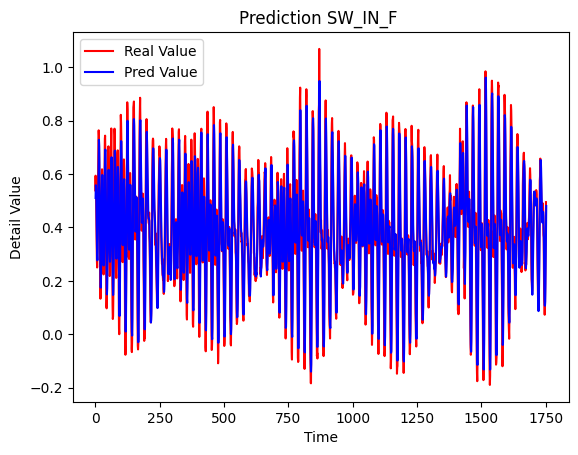

MSE: 0.0010457812129743415
MAE: 0.025382628516552513
R²: 0.979914423905033
RMSE: 0.032338540674779086
nRMSE: [0.02568589]
pred_finally:           Pred
1     0.510575
2     0.558077
3     0.546473
4     0.500623
5     0.425959
...        ...
1748  0.121318
1749  0.190492
1750  0.289980
1751  0.392766
1752  0.480556

[1752 rows x 1 columns]


In [63]:
def nRMSE(rmse,y_true):
    return rmse / (max(y_true) - min(y_true))

plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')
plt.title('Prediction SW_IN_F ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('nRMSE:', nRMSE(np.sqrt(mse(y_true, pred)),y_true))
print('pred_finally:', pred)

In [ ]:
y_pred = np.array(df).reshape(-1, 1)
#将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将结果存储在prediction_copies_array数组中
prediction_copies_array = np.repeat(y_pred, 6, axis=-1)
#prediction_copies_array
#prediction_copies_array.shape
pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(y_pred), 6)))[:,5]  #进行逆变换但是，只需要最后一列

# print(pred)
original_copies_array = np.repeat(testY, 6, axis=-1)
y_true = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), 6)))[:, 5]
# y_true = scaler.inverse_transform(np.array(testY).reshape(-1,1))

y_true
pred
print(pred)
plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')
plt.title('Prediction SW_IN_F ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('pred_finally:', pred)


In [61]:
# ALL_Factor_IMF1 = IMF[0:6][:]
# ALL_Factor_IMF1 = np.array(ALL_Factor_IMF1)
# IMF1_Input = np.transpose(ALL_Factor_IMF1)
# #[AT,Baro,WD,WG,WL,WS]
# IMF1_Input
# df_IMF1 = pd.DataFrame(IMF1_Input)
# df_IMF1.columns = ['AT','Baro','WD','WG','WL','WS']
# df_IMF1[['WS','WD','WG','AT','Baro','WL']]

## 2. Vanilla LSTM

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

We can define a Vanilla LSTM for univariate time series forecasting as follows.

In [139]:
from torch.optim import Adam
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# define model
def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(1, 6)))
    # optimizer = Adam()  # 设置为您希望的学习率
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model


N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_6960\1754990687.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


In [140]:
%%time
from sklearn.model_selection import GridSearchCV

# 定义超参数搜索范围
param_grid = {
    'optimizer': ['adam'],
    'batch_size': [32,64,128],
    'epochs': [30, 50]
}

# 执行网格搜索
grid = GridSearchCV(estimator=N_LSTM_Model, param_grid=param_grid, cv=2)
grid_result = grid.fit(trainX, trainY)

Epoch 1/30
110/110 [==============================] - 2s 3ms/step - loss: 0.0408 - val_loss: 0.0100
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0072
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0068
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0066
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0063

In [141]:
# 假设已经完成超参数优化并获得了最佳模型
best_model = grid_result.best_estimator_

# 使用最佳模型进行预测
# y_pred = best_model.predict(testX)

In [142]:
# %%time
# N_LSTM_Model.fit(trainX, trainY)

## 3. Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

An LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as an interpretation from the end of the sequence.

We can address this by having the LSTM output a value for each time step in the input data by setting the return_sequences=True argument on the layer. This allows us to have 3D output from hidden LSTM layer as input to the next.

In [17]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import keras.backend as K


# def Stack_LSTM():
#     model = Sequential()
#     model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
#     model.add(LSTM(100, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')
#     return model
def create_model(optimizer='adam', batch_size=32, epochs=40):
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Stack_LSTM_Model = KerasRegressor(build_fn=create_model(), epochs=40, verbose=1, validation_data=(testX, testY))
Stack_LSTM_Model = KerasRegressor(create_model,verbose=1)
# history = Stack_LSTM().fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))

# Stack_LSTM_Model = KerasRegressor(Stack_LSTM,epochs=30,verbose=1, validation_data=(testX, testY))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_35732\4008304438.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(create_model,verbose=1)


In [18]:
from sklearn.model_selection import GridSearchCV

# 定义超参数搜索范围
param_grid = {
    'optimizer': ['adam'],
    'batch_size': [5,10,16, 32, 64],
    'epochs': [20,30, 40, 50]
}
# 执行网格搜索
grid = GridSearchCV(estimator=Stack_LSTM_Model, param_grid=param_grid, cv=2)
grid_result = grid.fit(trainX, trainY)

Epoch 1/20
702/702 [==============================] - 2s 1ms/step - loss: 0.0143
Epoch 2/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 3/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 4/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 5/20
702/702 [==============================] - 1s 971us/step - loss: 0.0045
Epoch 6/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 7/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 8/20
702/702 [==============================] - 1s 980us/step - loss: 0.0046
Epoch 9/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 10/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 11/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 12/20
702/702 [==============================] - 1s 981us/step - loss: 0.0044
Epoch 13/20
702/702

In [112]:
# 假设已经完成超参数优化并获得了最佳模型
best_model = grid_result.best_estimator_

# 使用最佳模型进行预测
y_pred = best_model.predict(testX)


351/351 [==============================] - 0s 800us/step


In [26]:
%%time
Stack_LSTM_Model.fit(trainX, trainY)

Epoch 1/40
220/220 [==============================] - 3s 3ms/step - loss: 0.0375 - val_loss: 0.0059
Epoch 2/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 3/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 4/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 5/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 6/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 7/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 8/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0060
Epoch 9/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 10/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0056

## 4. Bidirectional LSTM


On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

This is called a Bidirectional LSTM.

We can implement a Bidirectional LSTM for univariate time series forecasting by wrapping the first hidden layer in a wrapper layer called Bidirectional.

In [243]:
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import keras.backend as K


def BiLSTM():
    model = Sequential()
    model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 14)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


# BiLSTM_Model = BiLSTM()
# history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
# Access the training and validation loss values
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# Print the training and validation loss values for each epoch
# for epoch in range(len(train_loss)):
#     print("Epoch {}: Train Loss = {}, Val Loss = {}".format(epoch+1, train_loss[epoch], val_loss[epoch]))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_429876\2549510797.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


In [244]:
%%time
BiLSTM_Model.fit(trainX, trainY)

Epoch 1/40
1039/1039 [==============================] - 4s 2ms/step - loss: 0.0119 - val_loss: 0.0096
Epoch 2/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0073 - val_loss: 0.0087
Epoch 3/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0068 - val_loss: 0.0076
Epoch 4/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0067 - val_loss: 0.0070
Epoch 5/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 6/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 7/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch 8/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0063 - val_loss: 0.0077
Epoch 9/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0062 - val_loss: 0.0065
Epoch 10/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.006

## 5. CNN LSTM 

A convolutional neural network, or CNN for short, is a type of neural network developed for working with two-dimensional image data.

The CNN can be very effective at automatically extracting and learning features from one-dimensional sequence data such as univariate time series data.

In [ ]:
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps):
# 	X, y = list(), list()
# 	for i in range(len(sequence)):
# 		# find the end of this pattern
# 		end_ix = i + n_steps
# 		# check if we are beyond the sequence
# 		if end_ix > len(sequence)-1:
# 			break
# 		# gather input and output parts of the pattern
# 		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
# 		X.append(seq_x)
# 		y.append(seq_y)
# 	return array(X), array(y)

# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
# n_steps = 4
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
# n_features = 1
# n_seq = 1
# n_steps = 2
# X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [11]:
# Reshape trainX and testX to (samples, timesteps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


In [ ]:
trainX.shape

In [ ]:
testX.shape

In [ ]:
trainX.shape

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D

# Reshape trainX and testX to (samples, timesteps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[2], trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[2], testX.shape[1]))


# Define model
def CnnLSTM():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


# Train the model
CnnLSTM_Model = CnnLSTM().fit(trainX, trainY, epochs=30, verbose=1, validation_data=(testX, testY))

Epoch 1/30
784/784 [==============================] - 4s 4ms/step - loss: 0.0158 - val_loss: 0.0106
Epoch 2/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 3/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 4/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 5/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 6/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 7/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 8/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 9/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0097 - val_loss: 0.0102
Epoch 10/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0096 - val_loss: 0.0096

In [ ]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


# define model
def CnnLSTM():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


CnnLSTM_Model = CnnLSTM().fit(trainX, trainY, epochs=30, verbose=1, validation_data=(testX, testY))

In [ ]:
# demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
# n_features = 1
# n_seq = 2
# n_steps = 2
# X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [ ]:
X

In [ ]:
X.shape

## 6. ConvLSTM

A type of LSTM related to the CNN-LSTM is the ConvLSTM, where the convolutional reading of input is built directly into each LSTM unit.

The ConvLSTM was developed for reading two-dimensional spatial-temporal data, but can be adapted for use with univariate time series forecasting.

In [ ]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D


# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Multivariate LSTM Models

Multivariate time series data means data where there is more than one observation for each time step.



In [ ]:
# multivariate lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ##  Multi-Step LSTM Models

A time series forecasting problem that requires a prediction of multiple time steps into the future can be referred to as multi-step time series forecasting

In [ ]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Encoder-Decoder LSTM


In [ ]:
# univariate multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed


# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Multivariate Multi-Step LSTM Models


In [ ]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Reference:-  https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecastings/